In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import requests
import json
import gmaps

# Google API Key
from config import gkey

In [2]:
#csv = "true_car_listings.csv"
#df = pd.read_csv(csv)
#df.head()

In [3]:
csv = "tc20171021.csv"
df = pd.read_csv(csv, error_bad_lines=False)
df.head()

b'Skipping line 297911: expected 9 fields, saw 10\nSkipping line 297912: expected 9 fields, saw 10\nSkipping line 297913: expected 9 fields, saw 10\nSkipping line 297914: expected 9 fields, saw 10\nSkipping line 297915: expected 9 fields, saw 10\nSkipping line 297916: expected 9 fields, saw 10\nSkipping line 297917: expected 9 fields, saw 10\nSkipping line 297918: expected 9 fields, saw 10\nSkipping line 297919: expected 9 fields, saw 10\nSkipping line 297920: expected 9 fields, saw 10\nSkipping line 297921: expected 9 fields, saw 10\nSkipping line 297922: expected 9 fields, saw 10\nSkipping line 297923: expected 9 fields, saw 10\nSkipping line 297925: expected 9 fields, saw 10\nSkipping line 297926: expected 9 fields, saw 10\nSkipping line 297927: expected 9 fields, saw 10\nSkipping line 297928: expected 9 fields, saw 10\nSkipping line 297929: expected 9 fields, saw 10\nSkipping line 297930: expected 9 fields, saw 10\nSkipping line 297931: expected 9 fields, saw 10\nSkipping line 2979

b'Skipping line 943223: expected 9 fields, saw 10\n'
b'Skipping line 1081866: expected 9 fields, saw 10\nSkipping line 1081867: expected 9 fields, saw 10\nSkipping line 1081868: expected 9 fields, saw 10\nSkipping line 1081869: expected 9 fields, saw 10\nSkipping line 1081870: expected 9 fields, saw 10\nSkipping line 1081871: expected 9 fields, saw 10\nSkipping line 1081872: expected 9 fields, saw 10\nSkipping line 1081873: expected 9 fields, saw 10\nSkipping line 1081874: expected 9 fields, saw 10\nSkipping line 1081876: expected 9 fields, saw 10\nSkipping line 1081877: expected 9 fields, saw 10\nSkipping line 1081878: expected 9 fields, saw 10\nSkipping line 1081879: expected 9 fields, saw 10\nSkipping line 1081881: expected 9 fields, saw 10\nSkipping line 1081882: expected 9 fields, saw 10\nSkipping line 1081883: expected 9 fields, saw 10\nSkipping line 1081884: expected 9 fields, saw 10\nSkipping line 1081885: expected 9 fields, saw 10\nSkipping line 1081886: expected 9 fields, saw

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [4]:
df.count()

Id         1216250
Price      1216250
Year       1216250
Mileage    1216250
City       1216250
State      1216250
Vin        1216250
Make       1216250
Model      1216250
dtype: int64

In [5]:
df['Vin'].nunique()

1216250

In [6]:
df.head().sort_values(by='Vin')

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather


In [7]:
df['State'] = df['State'].str.upper()
df['State'] = df['State'].str.strip()
df['City'] = df['City'].str.title()
df_state = df.groupby('State')

## The below data can be used to determine the number of luxuary cars sold in each state and can be integrated into a heatmap

In [8]:
# Number of sales of each model within the state
df_state['Make'].value_counts()

State  Make         
AK     Ford             490
       Chevrolet        421
       Toyota           231
       Nissan           221
       Jeep             132
       Dodge            129
       GMC              124
       Kia               77
       Hyundai           62
       Subaru            46
       Chrysler          45
       Ram               35
       Honda             30
       Volkswagen        28
       Cadillac          21
       Mercedes-Benz     19
       Mazda             17
       BMW               14
       Buick             13
       Lexus             11
       Lincoln           10
       HUMMER             9
       Scion              8
       INFINITI           6
       Mitsubishi         6
       Acura              5
       MINI               5
       Audi               4
       Land               4
       Pontiac            4
                       ... 
WY     Ford             171
       Nissan            93
       GMC               79
       Jeep              78

In [9]:
df.dropna(axis=0,how='any')
df = df.drop(columns='Id')
df['Price'].mean()

20968.87068036999

In [10]:
df_state['Price'].mean().sort_values()

State
DC    12140.137931
HI    16961.619483
OH    18372.442953
VT    18515.179589
CT    18533.363225
VA    18654.514981
MI    18752.115637
IN    19323.136779
AZ    19798.936564
KY    20007.798294
ID    20142.751214
KS    20217.264443
WI    20293.268670
NV    20310.975496
ND    20333.502463
MD    20387.306074
SC    20568.712574
AK    20638.787149
FL    20652.382162
NH    20680.076876
MO    20706.417668
MN    20720.982433
IL    20759.267675
CO    20821.627976
TN    20826.921489
NC    20982.086357
GA    21015.141227
PA    21023.550564
UT    21050.249801
OK    21091.151558
CA    21156.178686
NJ    21162.896640
IA    21211.132512
DE    21233.127809
MA    21238.257111
WA    21318.272868
OR    21504.992609
NE    21570.185237
AL    21776.740875
RI    21903.059556
NY    21943.813963
ME    22059.343991
NM    22396.521658
LA    22541.929251
WV    22760.896621
AR    22762.467245
TX    23081.809524
MS    23255.015577
SD    23649.442047
MT    23914.479907
WY    24109.678019
Name: Price, dtype: float

In [11]:
#This shows how many used cars were sold in which states and the sum of used care sales
# Also did an average price calculation here
# One thing that would be missed are cars (with the same VIM) sold multiples time within a state
df_statesalescount = pd.DataFrame({'Total Price': df_state['Price'].sum(),'Vin Count': df_state['Vin'].count()})
df_statesalescount['Average Sale'] = df_statesalescount['Total Price']/df_statesalescount['Vin Count']
df_statesalescount.head(50).sort_values(by='Total Price',ascending=False)

,Total Price,Vin Count,Average Sale
State,,,
TX,3216103930,139335,23081.809524
CA,2425746292,114659,21156.178686
FL,2217136487,107355,20652.382162
GA,1169303473,55641,21015.141227
IL,1137483313,54794,20759.267675
NC,1103322029,52584,20982.086357
VA,917074611,49161,18654.514981
PA,846534287,40266,21023.550564
NY,827918157,37729,21943.813963


In [12]:
testdf = df.loc[df['State'] == 'TX', :]
testdf.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
18,15239,2015,20681,Dallas,TX,KL4CJBSB2FB179802,Buick,EncoreConvenience
50,15499,2015,37406,Killeen,TX,KL4CJBSB5FB096686,Buick,EncoreConvenience
53,16445,2015,19469,Grapevine,TX,KL4CJBSBXFB166232,Buick,EncoreConvenience
54,15750,2015,26927,Grapevine,TX,KL4CJBSB6FB162873,Buick,EncoreConvenience
68,17500,2016,20157,Grapevine,TX,KL4CJBSB7GB529197,Buick,EncoreConvenience


In [13]:
df.loc[df['State'] == 'DC', :].sort_values(by='Price')

,Price,Year,Mileage,City,State,Vin,Make,Model
929216,4999,2001,163725,Washington,DC,JTHBD182810028136,Lexus,ISIS
1053438,5999,2002,110058,Washington,DC,5N1ED28Y52C518361,Nissan,Xterra4dr
167094,6500,2001,110000,Washington,DC,WBAGH83411DP29149,BMW,7
976190,6999,2002,122000,Washington,DC,WDBNG75J22A283847,Mercedes-Benz,S-ClassS500
1062599,7249,2005,138061,Washington,DC,1N4BL11D35C319671,Nissan,Altima4dr
176524,7495,2000,137360,Washington,DC,WAUDD68D1YA160035,Audi,S44dr
163288,7895,2007,142870,Washington,DC,WBAVC73527KP31229,BMW,3
154349,7999,2002,145063,Washington,DC,5UXFB33582LH34630,BMW,X5AWD
832946,8499,2006,132873,Washington,DC,JNKAY01F66M254764,INFINITI,M35x
774892,8500,2007,124000,Washington,DC,2HJYK163X7H516243,Honda,RidgelineRTX


In [14]:
df_make = df.groupby('Make')
df_make['Vin'].count().sort_values(ascending=False)

Make
Ford             161999
Chevrolet        150426
Toyota           115095
Nissan            98710
Honda             76880
Jeep              60323
Hyundai           54647
Dodge             50688
GMC               43045
Kia               42834
Mercedes-Benz     38131
Volkswagen        33238
BMW               32415
Lexus             29830
Chrysler          23848
Subaru            23758
Cadillac          21911
Mazda             19857
Buick             18157
INFINITI          17752
Ram               15245
Audi              12618
Acura             11049
Lincoln           10069
Volvo              7337
MINI               6224
Mitsubishi         5933
Land               5844
Porsche            5785
Scion              4389
Jaguar             3114
FIAT               2613
Pontiac            2582
Mercury            1594
Saturn             1444
Maserati           1379
HUMMER             1333
smart               982
Suzuki              484
Ferrari             420
Bentley             367
Saab       

In [15]:
df_make['Price'].mean()

Make
AM                59934.210526
Acura             23196.606480
Alfa              54228.704545
Aston             99573.617450
Audi              28960.997385
BMW               26920.712664
Bentley          101075.310627
Buick             18781.214022
Cadillac          27891.704395
Chevrolet         21770.092185
Chrysler          15744.883303
Dodge             18022.711727
FIAT              11930.197857
Ferrari          200600.085714
Fisker            46770.720000
Ford              21311.796721
Freightliner      28341.076923
GMC               28162.684888
Genesis           44733.229665
Geo                3998.000000
HUMMER            18704.528882
Honda             16670.602575
Hyundai           14298.765532
INFINITI          25609.084385
Isuzu              4676.161905
Jaguar            34416.353243
Jeep              22286.489747
Kia               15388.701055
Lamborghini      186711.382979
Land              40025.407084
Lexus             26367.210996
Lincoln           23043.063561
Lot

In [16]:
df_make['State'].value_counts()

Make   State
AM     TX         4
       CA         3
       FL         2
       AR         1
       CO         1
       CT         1
       GA         1
       IN         1
       MA         1
       NJ         1
       OR         1
       SD         1
       VA         1
Acura  CA       981
       TX       981
       FL       859
       IL       735
       NY       649
       GA       643
       VA       617
       PA       539
       NJ       517
       CO       467
       NC       411
       WA       387
       MD       361
       OH       300
       MA       236
       AZ       226
       CT       226
               ... 
smart  LA        33
       GA        25
       IL        25
       MD        25
       NC        25
       VA        23
       HI        22
       AR        16
       OH        15
       TN        12
       PA        11
       MA        10
       MO         9
       KS         8
       OK         8
       WI         7
       NV         5
       AL         4
       

In [17]:
df_sm = (df.groupby(['State', 'Make'])
   .mean()
   .unstack())

In [18]:
df_sm['Price'].head()

Make,AM,Acura,Alfa,Aston,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
State,,,,,,,,,,,,,,,,,,,,,
AK,NaN,19473.000000,NaN,NaN,29634.750000,28165.785714,NaN,15516.538462,27343.142857,23260.950119,...,7372.500000,8995.000000,12500.000000,19317.086957,8372.25,NaN,17818.095238,13853.857143,38995.000000,NaN
AL,NaN,22722.352113,38975.0,69997.000000,31329.065217,27684.083333,112468.500000,19567.795053,27870.941538,23442.461271,...,9650.000000,7061.214286,12665.173077,19640.507463,7724.20,49973.500000,21000.459337,15101.019950,19008.488889,5810.250000
AR,56400.0,24889.732143,NaN,NaN,31712.266667,29969.423358,NaN,20344.596491,25899.082759,23344.982441,...,NaN,4135.400000,13831.700000,22703.086957,4995.00,NaN,22550.178669,16308.805085,23172.125000,7699.437500
AZ,NaN,25512.699115,NaN,53430.250000,25915.689781,24639.455458,81494.461538,18401.097561,26444.421286,20397.200135,...,6305.166667,6856.000000,12492.115607,20301.129979,8129.25,74885.333333,18817.745539,15424.558242,26997.668203,7175.754386
CA,63663.0,21964.185525,46589.0,95310.764706,27285.964523,27255.691116,106717.465753,19974.645969,29761.846154,22469.620554,...,7710.684211,6084.228571,13272.478351,20596.950035,6410.00,59779.375000,18162.717602,14581.692397,24165.710652,7693.962617


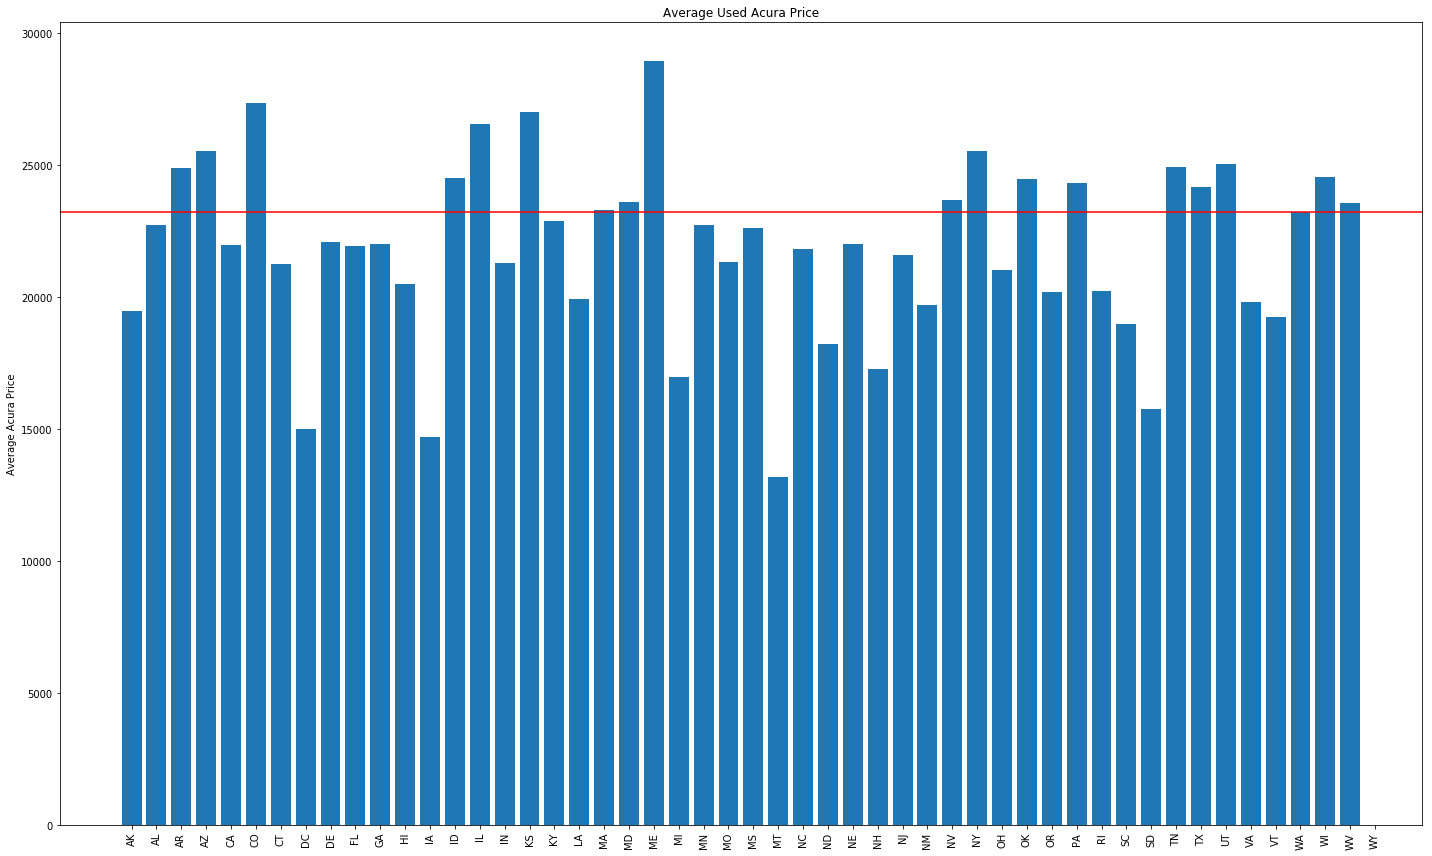

In [ ]:
figure(num=None, figsize=(20, 12))
plt.bar(x=df_sm['Price'].index,height=df_sm['Price']['Acura'])
plt.ylabel('Average Acura Price')
plt.title('Average Used Acura Price')
plt.xticks(df_sm['Price'].index, df_sm['Price'].index, rotation='vertical')
plt.axhline(y=23197, color='r', linestyle='-')

#plt.show()
plt.tight_layout()

In [ ]:
df_ms = (df.groupby(['Make', 'State'])
   .mean()
   .unstack())
df_ms['Price']

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Make,,,,,,,,,,,,,,,,,,,,,
AM,NaN,NaN,56400.000000,NaN,63663.000000,54990.000000,65927.000000,NaN,NaN,64491.500000,...,67000.000000,NaN,64244.250000,NaN,48900.000000,NaN,NaN,NaN,NaN,NaN
Acura,19473.000000,22722.352113,24889.732143,25512.699115,21964.185525,27344.421842,21235.234513,14995.000000,22066.363636,21934.878929,...,15734.000000,24918.647959,24161.928644,25011.993197,19798.808752,19254.400000,23230.271318,24554.173077,23548.500000,NaN
Alfa,NaN,38975.000000,NaN,NaN,46589.000000,78987.000000,NaN,NaN,NaN,48648.666667,...,NaN,NaN,58619.333333,NaN,NaN,NaN,60713.000000,NaN,NaN,NaN
Aston,NaN,69997.000000,NaN,53430.250000,95310.764706,80207.333333,NaN,NaN,NaN,125532.423077,...,NaN,125944.000000,91586.545455,NaN,83833.333333,NaN,111829.500000,NaN,NaN,NaN
Audi,29634.750000,31329.065217,31712.266667,25915.689781,27285.964523,28403.194704,21446.317949,7495.000000,37497.968750,30975.398171,...,24127.200000,29768.684848,32537.796805,27482.750000,25090.950368,25467.750000,29858.975332,27971.376238,21678.666667,29246.000000
BMW,28165.785714,27684.083333,29969.423358,24639.455458,27255.691116,26149.697174,25604.018970,9677.600000,21809.454545,25541.660049,...,24097.500000,19832.397849,26843.653579,20605.288344,22583.633861,22608.000000,25010.774044,29682.626437,18281.818182,28413.000000
Bentley,NaN,112468.500000,NaN,81494.461538,106717.465753,73535.142857,NaN,NaN,157900.000000,109724.742857,...,NaN,48766.333333,93325.583333,53830.000000,79863.333333,NaN,90223.750000,NaN,NaN,NaN
Buick,15516.538462,19567.795053,20344.596491,18401.097561,19974.645969,17933.600000,17274.582857,NaN,19469.450000,19757.973744,...,25530.205882,17836.809645,19717.683051,18400.370370,17281.333913,17471.375000,17017.231441,18175.477444,18599.407407,21111.521739
Cadillac,27343.142857,27870.941538,25899.082759,26444.421286,29761.846154,26083.790419,25680.388571,NaN,25758.726027,27235.132372,...,30782.428571,28066.105066,30196.249834,28271.737589,24908.540569,22700.500000,30017.672584,26117.769608,31499.000000,22562.458333


In [ ]:
df_sm['Price'].idxmax()

Make
AM               OR
Acura            ME
Alfa             CO
Aston            TN
Audi             DE
BMW              RI
Bentley          OH
Buick            SD
Cadillac         MT
Chevrolet        MT
Chrysler         WV
Dodge            WV
FIAT             WY
Ferrari          WA
Fisker           NJ
Ford             WY
Freightliner     NC
GMC              SD
Genesis          MO
Geo              CO
HUMMER           MD
Honda            WV
Hyundai          WV
INFINITI         MT
Isuzu            AL
Jaguar           RI
Jeep             WY
Kia              MN
Lamborghini      NY
Land             ME
Lexus            NY
Lincoln          MT
Lotus            NM
MINI             WY
Maserati         SC
Maybach          CA
Mazda            SD
McLaren          CA
Mercedes-Benz    ME
Mercury          NV
Mitsubishi       WV
Nissan           AR
Oldsmobile       CT
Plymouth         SC
Pontiac          NM
Porsche          NY
Ram              SD
Rolls-Royce      OH
Saab             IA
Saturn         

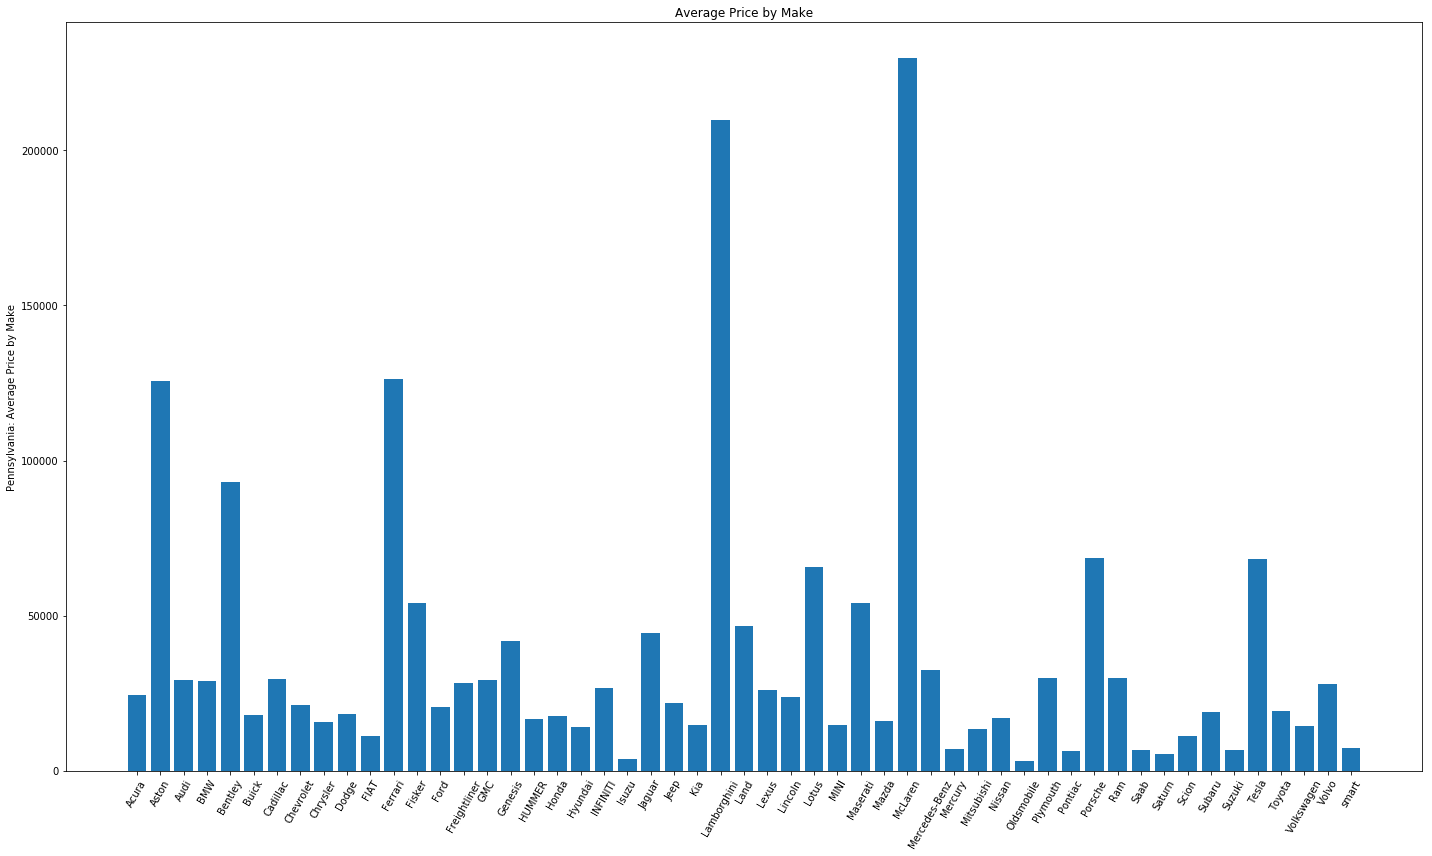

In [ ]:
#Plots average uuser car price per manufacturer when buying in Pennsylvania
pa_prices = df_ms['Price']['PA'].dropna()

figure(num=None, figsize=(20, 12))
plt.bar(x=pa_prices.index,height=pa_prices)
plt.ylabel('Pennsylvania: Average Price by Make')
plt.title('Average Price by Make')
plt.xticks(pa_prices.index, pa_prices.index, rotation=60)
#plt.axhline(y=23197, color='r', linestyle='-')
plt.tight_layout()
plt.show()


In [ ]:
df_ms['Price']['PA']

Make
AM                         NaN
Acura             24325.730983
Alfa                       NaN
Aston            125660.000000
Audi              29325.864924
BMW               28832.405464
Bentley           93074.750000
Buick             17984.762611
Cadillac          29504.290323
Chevrolet         21092.222894
Chrysler          15605.521186
Dodge             18333.724165
FIAT              11188.028571
Ferrari          126126.333333
Fisker            53995.000000
Ford              20562.735229
Freightliner      28137.500000
GMC               29143.454075
Genesis           41691.333333
Geo                        NaN
HUMMER            16587.739130
Honda             17553.827408
Hyundai           14123.130266
INFINITI          26622.601942
Isuzu              3621.250000
Jaguar            44463.437500
Jeep              21715.978947
Kia               14691.787587
Lamborghini      209656.857143
Land              46761.159292
Lexus             25852.366826
Lincoln           23870.804971
Lot

In [ ]:
df_gr_city = df.groupby(['City'])
df_gr_city.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
5,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
7,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD
8,16995,2015,8624,Punta Gorda,FL,KL4CJFSB7FB173565,Buick,EncoreConvenience
9,17700,2015,13807,Jacksonville,NC,KL4CJBSB8FB068543,Buick,EncoreConvenience


In [ ]:
#Average Price in each city
df_gr_city['Price'].mean()

City
Abbeville           24501.460177
Aberdeen            15954.458937
Abilene             22628.855263
Abington            14834.700913
Acton               25209.448276
Acworth             25481.650943
Ada                 26420.869565
Adamsburg           22795.643939
Addison             25687.784203
Adel                31407.224138
Adrian              18666.991870
Aiea                24594.121212
Aiken               11178.357143
Akron               17535.988116
Alachua             18694.551282
Alameda             13971.606557
Alamogordo          25256.093567
Albany              22299.242449
Albemarle           14934.194030
Albermarle          17436.513514
Albert Lea          19647.574468
Albertville         20258.263889
Albion              18575.208791
Albuqueque          18938.095238
Albuquerque         22144.751622
Alcoa               22485.261694
Alexander City      22090.729167
Alexandria          24210.319742
Algonquin           14938.366972
Alhambra            19210.741351
     

In [ ]:
#df_demo = df.groupby(['State'])['Make'].value_counts()

In [ ]:
df_city = df.groupby(['City', 'State'])

df_gr_city_make = df.groupby(['City', 'Make'])
df_city = pd.DataFrame({'Price': df_gr_city_make['Price'].mean()})
df_gr_city_make.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
5,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
7,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD
8,16995,2015,8624,Punta Gorda,FL,KL4CJFSB7FB173565,Buick,EncoreConvenience
9,17700,2015,13807,Jacksonville,NC,KL4CJBSB8FB068543,Buick,EncoreConvenience


In [ ]:
df_city.head(5)

Price
City      Make                   
Abbeville BMW        18892.500000
          Buick      27865.000000
          Cadillac   25689.000000
          Chevrolet  26294.333333
          Dodge      20936.333333

In [ ]:
df_city['Lat'] = ''
df_city['Lng'] = ''
df_city.head(50)

Price Lat Lng
City      Make                               
Abbeville BMW            18892.500000        
          Buick          27865.000000        
          Cadillac       25689.000000        
          Chevrolet      26294.333333        
          Dodge          20936.333333        
          Ford           28747.437500        
          GMC            22093.428571        
          Honda           9162.000000        
          Hyundai        18865.000000        
          Jeep           26716.000000        
          Kia            14026.333333        
          Lexus          12815.000000        
          Lincoln         9275.000000        
          Mazda          16225.000000        
          Mercedes-Benz  21215.000000        
          Nissan         22140.500000        
          Ram            20431.000000        
          Subaru         22824.000000        
          Toyota         21366.666667        
          Volkswagen      5875.000000        
Aberdeen  Buick          21699.750000        
          Cadillac       28257.333333        
          Chevrolet      16436.425000        
          Chrysler       11953.555556        
          Dodge          18969.869565        
          FIAT           15331.000000        
          Ford           14622.541667        
          GMC            26405.000000        
          Honda          12716.888889        
          Hyundai        10405.285714        
          Jeep           19532.400000        
          Kia            14366.666667        
          Lexus          14417.500000        
          Lincoln        18950.000000        
          MINI            8495.000000        
          Mazda           3988.000000        
          Mercedes-Benz  18500.000000        
          Mercury         5677.500000        
          Nissan         10963.000000        
          Ram            34569.333333        
          Saturn          8871.000000        
          Scion           4699.000000        
          Toyota         12566.111111        
          Volkswagen     13357.666667        
Abilene   Acura          12000.000000        
          Audi           26750.000000        
          BMW            19581.000000        
          Buick          19917.567568        
          Cadillac       28687.826087        
          Chevrolet      24898.875000

In [ ]:
# This block generates the lat and lng by making gmaps api calls, currently set up to fill 'Lat' and 'Lng' in df)city
params = {"key": gkey}

# Loop through rows and run a lat/long search for each city
for index, row in df_city.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    print(row)
    city = row
    state = row[0]

    # update address key value
    params['address'] = f"{city},{state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    print(city, state)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        print(f'Latitude: {cities_lat_lng["results"][0]["geometry"]["location"]["lat"]}, Longitude: {cities_lat_lng["results"][0]["geometry"]["location"]["lng"]}')
        df_city.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        df_city.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        df_city.loc[index, "Lat"] = np.NaN
        df_city.loc[index, "Lng"] = np.NaN
    print("------------")         
# Visualize to confirm lat lng appear
df_city.head()

Price    18892.5
Lat             
Lng             
Name: (Abbeville, BMW), dtype: object
Price    18892.5
Lat             
Lng             
Name: (Abbeville, BMW), dtype: object 18892.5
Missing field/result... skipping.
------------
Price    27865
Lat           
Lng           
Name: (Abbeville, Buick), dtype: object
Price    27865
Lat           
Lng           
Name: (Abbeville, Buick), dtype: object 27865.0
Latitude: 35.5562383, Longitude: -76.8028933
------------
Price    25689
Lat           
Lng           
Name: (Abbeville, Cadillac), dtype: object
Price    25689
Lat           
Lng           
Name: (Abbeville, Cadillac), dtype: object 25689.0
Missing field/result... skipping.
------------
Price    26294.3
Lat             
Lng             
Name: (Abbeville, Chevrolet), dtype: object
Price    26294.3
Lat             
Lng             
Name: (Abbeville, Chevrolet), dtype: object 26294.333333333332
Missing field/result... skipping.
------------
Price    20936.3
Lat             
Lng       

Price    8495
Lat          
Lng          
Name: (Aberdeen, MINI), dtype: object 8495.0
Latitude: 57.1065654, Longitude: -2.0959409
------------
Price    3988
Lat          
Lng          
Name: (Aberdeen, Mazda), dtype: object
Price    3988
Lat          
Lng          
Name: (Aberdeen, Mazda), dtype: object 3988.0
Latitude: 57.149717, Longitude: -2.094278
------------
Price    18500
Lat           
Lng           
Name: (Aberdeen, Mercedes-Benz), dtype: object
Price    18500
Lat           
Lng           
Name: (Aberdeen, Mercedes-Benz), dtype: object 18500.0
Latitude: 57.149717, Longitude: -2.094278
------------
Price    5677.5
Lat            
Lng            
Name: (Aberdeen, Mercury), dtype: object
Price    5677.5
Lat            
Lng            
Name: (Aberdeen, Mercury), dtype: object 5677.5
Latitude: 37.035735, Longitude: -76.40823
------------
Price    10963
Lat           
Lng           
Name: (Aberdeen, Nissan), dtype: object
Price    10963
Lat           
Lng           
Name: (Aberdeen

Price    8993
Lat          
Lng          
Name: (Abilene, Mercury), dtype: object 8993.0
Latitude: 32.4487364, Longitude: -99.73314390000002
------------
Price    21100
Lat           
Lng           
Name: (Abilene, Mitsubishi), dtype: object
Price    21100
Lat           
Lng           
Name: (Abilene, Mitsubishi), dtype: object 21100.0
Latitude: 32.4487364, Longitude: -99.73314390000002
------------
Price    17622.7
Lat             
Lng             
Name: (Abilene, Nissan), dtype: object
Price    17622.7
Lat             
Lng             
Name: (Abilene, Nissan), dtype: object 17622.666666666668
Latitude: 32.4846314, Longitude: -99.7087112
------------
Price    16370
Lat           
Lng           
Name: (Abilene, Pontiac), dtype: object
Price    16370
Lat           
Lng           
Name: (Abilene, Pontiac), dtype: object 16370.0
Latitude: 32.4487364, Longitude: -99.73314390000002
------------
Price    27885.1
Lat             
Lng             
Name: (Abilene, Ram), dtype: object
Price    2

Price    7755.67
Lat             
Lng             
Name: (Abington, Mercury), dtype: object 7755.666666666667
Missing field/result... skipping.
------------
Price    18125
Lat           
Lng           
Name: (Abington, Mitsubishi), dtype: object
Price    18125
Lat           
Lng           
Name: (Abington, Mitsubishi), dtype: object 18125.0
Missing field/result... skipping.
------------
Price    14076.5
Lat             
Lng             
Name: (Abington, Nissan), dtype: object
Price    14076.5
Lat             
Lng             
Name: (Abington, Nissan), dtype: object 14076.515151515152
Missing field/result... skipping.
------------
Price    5995
Lat          
Lng          
Name: (Abington, Pontiac), dtype: object
Price    5995
Lat          
Lng          
Name: (Abington, Pontiac), dtype: object 5995.0
Missing field/result... skipping.
------------
Price    28778.2
Lat             
Lng             
Name: (Abington, Ram), dtype: object
Price    28778.2
Lat             
Lng             
Nam

Price    34656.6
Lat             
Lng             
Name: (Acworth, GMC), dtype: object 34656.58620689655
Latitude: 34.0659329, Longitude: -84.6768796
------------
Price    16400
Lat           
Lng           
Name: (Acworth, Honda), dtype: object
Price    16400
Lat           
Lng           
Name: (Acworth, Honda), dtype: object 16400.0
Latitude: 34.0659329, Longitude: -84.6768796
------------
Price    20988
Lat           
Lng           
Name: (Acworth, Hyundai), dtype: object
Price    20988
Lat           
Lng           
Name: (Acworth, Hyundai), dtype: object 20988.0
Latitude: 34.0659329, Longitude: -84.6768796
------------
Price    17689.3
Lat             
Lng             
Name: (Acworth, Jeep), dtype: object
Price    17689.3
Lat             
Lng             
Name: (Acworth, Jeep), dtype: object 17689.285714285714
Latitude: 34.0659329, Longitude: -84.6768796
------------
Price    12968.5
Lat             
Lng             
Name: (Acworth, Kia), dtype: object
Price    12968.5
Lat         

Price    10896
Lat           
Lng           
Name: (Adamsburg, Cadillac), dtype: object 10896.0
Latitude: 40.3117361, Longitude: -79.6561538
------------
Price    22480.2
Lat             
Lng             
Name: (Adamsburg, Chevrolet), dtype: object
Price    22480.2
Lat             
Lng             
Name: (Adamsburg, Chevrolet), dtype: object 22480.23076923077
Latitude: 40.3117361, Longitude: -79.6561538
------------
Price    10466
Lat           
Lng           
Name: (Adamsburg, Chrysler), dtype: object
Price    10466
Lat           
Lng           
Name: (Adamsburg, Chrysler), dtype: object 10466.0
Latitude: 40.8887394, Longitude: -73.8477874
------------
Price    13183.8
Lat             
Lng             
Name: (Adamsburg, Dodge), dtype: object
Price    13183.8
Lat             
Lng             
Name: (Adamsburg, Dodge), dtype: object 13183.75
Latitude: 40.3117361, Longitude: -79.6561538
------------
Price    25541.6
Lat             
Lng             
Name: (Adamsburg, Ford), dtype: object

Price    20890.6
Lat             
Lng             
Name: (Addison, INFINITI), dtype: object 20890.636363636364
Missing field/result... skipping.
------------
Price    28814.5
Lat             
Lng             
Name: (Addison, Jaguar), dtype: object
Price    28814.5
Lat             
Lng             
Name: (Addison, Jaguar), dtype: object 28814.48148148148
Latitude: 32.96179, Longitude: -96.82916850000001
------------
Price    24611.1
Lat             
Lng             
Name: (Addison, Jeep), dtype: object
Price    24611.1
Lat             
Lng             
Name: (Addison, Jeep), dtype: object 24611.060606060608
Latitude: 32.96179, Longitude: -96.82916850000001
------------
Price    12107.2
Lat             
Lng             
Name: (Addison, Kia), dtype: object
Price    12107.2
Lat             
Lng             
Name: (Addison, Kia), dtype: object 12107.214285714286
Missing field/result... skipping.
------------
Price    132497
Lat            
Lng            
Name: (Addison, Lamborghini), dtype

Price    19398
Lat           
Lng           
Name: (Adel, Nissan), dtype: object 19398.0
Latitude: 40.04000000000001, Longitude: -75.42
------------
Price    22898
Lat           
Lng           
Name: (Adel, Subaru), dtype: object
Price    22898
Lat           
Lng           
Name: (Adel, Subaru), dtype: object 22898.0
Latitude: 31.1371358, Longitude: -83.4234936
------------
Price    27161
Lat           
Lng           
Name: (Adel, Toyota), dtype: object
Price    27161
Lat           
Lng           
Name: (Adel, Toyota), dtype: object 27161.0
Latitude: 31.1371358, Longitude: -83.4234936
------------
Price    18720.3
Lat             
Lng             
Name: (Adrian, Buick), dtype: object
Price    18720.3
Lat             
Lng             
Name: (Adrian, Buick), dtype: object 18720.285714285714
Missing field/result... skipping.
------------
Price    23823
Lat           
Lng           
Name: (Adrian, Cadillac), dtype: object
Price    23823
Lat           
Lng           
Name: (Adrian, Cadillac

Price    169000
Lat            
Lng            
Name: (Aiea, Lamborghini), dtype: object 169000.0
Latitude: 21.386338, Longitude: -157.9255357
------------
Price    25042.9
Lat             
Lng             
Name: (Aiea, Land), dtype: object
Price    25042.9
Lat             
Lng             
Name: (Aiea, Land), dtype: object 25042.85714285714
Latitude: 21.386338, Longitude: -157.9255357
------------
Price    29455.6
Lat             
Lng             
Name: (Aiea, Lexus), dtype: object
Price    29455.6
Lat             
Lng             
Name: (Aiea, Lexus), dtype: object 29455.555555555555
Latitude: 21.386338, Longitude: -157.9255357
------------
Price    4900
Lat          
Lng          
Name: (Aiea, Lincoln), dtype: object
Price    4900
Lat          
Lng          
Name: (Aiea, Lincoln), dtype: object 4900.0
Latitude: 21.386338, Longitude: -157.9255357
------------
Price    18900
Lat           
Lng           
Name: (Aiea, MINI), dtype: object
Price    18900
Lat           
Lng           
Na

Price    12986.6
Lat             
Lng             
Name: (Akron, Hyundai), dtype: object 12986.550561797752
Latitude: 41.0814447, Longitude: -81.51900529999999
------------
Price    21150.9
Lat             
Lng             
Name: (Akron, INFINITI), dtype: object
Price    21150.9
Lat             
Lng             
Name: (Akron, INFINITI), dtype: object 21150.923076923078
Latitude: 41.0814447, Longitude: -81.51900529999999
------------
Price    19907.8
Lat             
Lng             
Name: (Akron, Jaguar), dtype: object
Price    19907.8
Lat             
Lng             
Name: (Akron, Jaguar), dtype: object 19907.75
Latitude: 41.0814447, Longitude: -81.51900529999999
------------
Price    17218.9
Lat             
Lng             
Name: (Akron, Jeep), dtype: object
Price    17218.9
Lat             
Lng             
Name: (Akron, Jeep), dtype: object 17218.938775510203
Latitude: 41.0814447, Longitude: -81.51900529999999
------------
Price    14880.2
Lat             
Lng             
Name: 

Price    10061
Lat           
Lng           
Name: (Alachua, Hyundai), dtype: object 10061.0
Latitude: 29.7938144, Longitude: -82.49442260000001
------------
Price    9611
Lat          
Lng          
Name: (Alachua, INFINITI), dtype: object
Price    9611
Lat          
Lng          
Name: (Alachua, INFINITI), dtype: object 9611.0
Latitude: 29.7938144, Longitude: -82.49442260000001
------------
Price    5989
Lat          
Lng          
Name: (Alachua, Jaguar), dtype: object
Price    5989
Lat          
Lng          
Name: (Alachua, Jaguar), dtype: object 5989.0
Latitude: 29.7938144, Longitude: -82.49442260000001
------------
Price    21281
Lat           
Lng           
Name: (Alachua, Jeep), dtype: object
Price    21281
Lat           
Lng           
Name: (Alachua, Jeep), dtype: object 21281.0
Latitude: 29.7938144, Longitude: -82.49442260000001
------------
Price    12541
Lat           
Lng           
Name: (Alachua, Kia), dtype: object
Price    12541
Lat           
Lng           
Name: (

Price    23861.2
Lat             
Lng             
Name: (Alamogordo, Ford), dtype: object 23861.22857142857
Latitude: 32.8995325, Longitude: -105.960265
------------
Price    34534.3
Lat             
Lng             
Name: (Alamogordo, GMC), dtype: object
Price    34534.3
Lat             
Lng             
Name: (Alamogordo, GMC), dtype: object 34534.28571428572
Latitude: 32.8995325, Longitude: -105.960265
------------
Price    19758.8
Lat             
Lng             
Name: (Alamogordo, Honda), dtype: object
Price    19758.8
Lat             
Lng             
Name: (Alamogordo, Honda), dtype: object 19758.833333333332
Latitude: 32.85846, Longitude: -105.9984671
------------
Price    15679.2
Lat             
Lng             
Name: (Alamogordo, Hyundai), dtype: object
Price    15679.2
Lat             
Lng             
Name: (Alamogordo, Hyundai), dtype: object 15679.166666666666
Latitude: 32.8995325, Longitude: -105.960265
------------
Price    23123.9
Lat             
Lng             
N

Price    15426.3
Lat             
Lng             
Name: (Albany, Kia), dtype: object 15426.296296296296
Latitude: 42.6525793, Longitude: -73.7562317
------------
Price    30170.5
Lat             
Lng             
Name: (Albany, Lexus), dtype: object
Price    30170.5
Lat             
Lng             
Name: (Albany, Lexus), dtype: object 30170.5
Latitude: 42.7717359, Longitude: -73.7524744
------------
Price    17773
Lat           
Lng           
Name: (Albany, Lincoln), dtype: object
Price    17773
Lat           
Lng           
Name: (Albany, Lincoln), dtype: object 17773.0
Latitude: 42.6525793, Longitude: -73.7562317
------------
Price    8420
Lat          
Lng          
Name: (Albany, MINI), dtype: object
Price    8420
Lat          
Lng          
Name: (Albany, MINI), dtype: object 8420.0
Latitude: 42.6525793, Longitude: -73.7562317
------------
Price    42995
Lat           
Lng           
Name: (Albany, Maserati), dtype: object
Price    42995
Lat           
Lng           
Name: (Alb

Price    24256
Lat           
Lng           
Name: (Albermarle, Cadillac), dtype: object 24256.0
Latitude: 37.2378563, Longitude: -82.2800546
------------
Price    19059.8
Lat             
Lng             
Name: (Albermarle, Chevrolet), dtype: object
Price    19059.8
Lat             
Lng             
Name: (Albermarle, Chevrolet), dtype: object 19059.75
Missing field/result... skipping.
------------
Price    10683.2
Lat             
Lng             
Name: (Albermarle, Chrysler), dtype: object
Price    10683.2
Lat             
Lng             
Name: (Albermarle, Chrysler), dtype: object 10683.2
Missing field/result... skipping.
------------
Price    16095.5
Lat             
Lng             
Name: (Albermarle, Dodge), dtype: object
Price    16095.5
Lat             
Lng             
Name: (Albermarle, Dodge), dtype: object 16095.5
Latitude: 35.3512701, Longitude: -80.163067
------------
Price    18689.1
Lat             
Lng             
Name: (Albermarle, Ford), dtype: object
Price    186

Price    20649
Lat           
Lng           
Name: (Albert Lea, Volkswagen), dtype: object 20649.0
Latitude: 43.6478006, Longitude: -93.3686555
------------
Price    29500
Lat           
Lng           
Name: (Albertville, BMW), dtype: object
Price    29500
Lat           
Lng           
Name: (Albertville, BMW), dtype: object 29500.0
Missing field/result... skipping.
------------
Price    17953.1
Lat             
Lng             
Name: (Albertville, Chevrolet), dtype: object
Price    17953.1
Lat             
Lng             
Name: (Albertville, Chevrolet), dtype: object 17953.14285714286
Latitude: 34.2675937, Longitude: -86.20886689999999
------------
Price    19711.7
Lat             
Lng             
Name: (Albertville, Dodge), dtype: object
Price    19711.7
Lat             
Lng             
Name: (Albertville, Dodge), dtype: object 19711.666666666668
Latitude: 34.2732626, Longitude: -86.19793969999999
------------
Price    10000
Lat           
Lng           
Name: (Albertville, FIAT),

Price    26943
Lat           
Lng           
Name: (Albuqueque, Jeep), dtype: object 26943.0
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    14816
Lat           
Lng           
Name: (Albuqueque, Kia), dtype: object
Price    14816
Lat           
Lng           
Name: (Albuqueque, Kia), dtype: object 14816.0
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    16488
Lat           
Lng           
Name: (Albuqueque, MINI), dtype: object
Price    16488
Lat           
Lng           
Name: (Albuqueque, MINI), dtype: object 16488.0
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    14306.5
Lat             
Lng             
Name: (Albuqueque, Mazda), dtype: object
Price    14306.5
Lat             
Lng             
Name: (Albuqueque, Mazda), dtype: object 14306.5
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    16488.2
Lat             
Lng             
Name: (Albuqueque, Nissan), dtype: object
Price    16488.2
Lat             
Ln

Price    6472.5
Lat            
Lng            
Name: (Albuquerque, Mercury), dtype: object 6472.5
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    14519.9
Lat             
Lng             
Name: (Albuquerque, Mitsubishi), dtype: object
Price    14519.9
Lat             
Lng             
Name: (Albuquerque, Mitsubishi), dtype: object 14519.86
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    18428.9
Lat             
Lng             
Name: (Albuquerque, Nissan), dtype: object
Price    18428.9
Lat             
Lng             
Name: (Albuquerque, Nissan), dtype: object 18428.941463414634
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    4777
Lat          
Lng          
Name: (Albuquerque, Oldsmobile), dtype: object
Price    4777
Lat          
Lng          
Name: (Albuquerque, Oldsmobile), dtype: object 4777.0
Latitude: 35.0843859, Longitude: -106.650422
------------
Price    12720.5
Lat             
Lng             
Name: (Albuquerque, P

Price    20995
Lat           
Lng           
Name: (Alcoa, Mercedes-Benz), dtype: object 20995.0
Missing field/result... skipping.
------------
Price    14987
Lat           
Lng           
Name: (Alcoa, Mitsubishi), dtype: object
Price    14987
Lat           
Lng           
Name: (Alcoa, Mitsubishi), dtype: object 14987.0
Missing field/result... skipping.
------------
Price    21225.6
Lat             
Lng             
Name: (Alcoa, Nissan), dtype: object
Price    21225.6
Lat             
Lng             
Name: (Alcoa, Nissan), dtype: object 21225.580152671755
Latitude: 35.8306428, Longitude: -83.9751931
------------
Price    30516.2
Lat             
Lng             
Name: (Alcoa, Ram), dtype: object
Price    30516.2
Lat             
Lng             
Name: (Alcoa, Ram), dtype: object 30516.227272727272
Missing field/result... skipping.
------------
Price    12995
Lat           
Lng           
Name: (Alcoa, Saturn), dtype: object
Price    12995
Lat           
Lng           
Name: (Alcoa,

Price    21126
Lat           
Lng           
Name: (Alexandria, Chevrolet), dtype: object 21126.011834319528
Latitude: 45.8565927, Longitude: -95.38902979999999
------------
Price    15498.2
Lat             
Lng             
Name: (Alexandria, Chrysler), dtype: object
Price    15498.2
Lat             
Lng             
Name: (Alexandria, Chrysler), dtype: object 15498.21875
Latitude: 38.7925109, Longitude: -77.0590517
------------
Price    19169.9
Lat             
Lng             
Name: (Alexandria, Dodge), dtype: object
Price    19169.9
Lat             
Lng             
Name: (Alexandria, Dodge), dtype: object 19169.938775510203
Latitude: 38.7925109, Longitude: -77.0590517
------------
Price    8125
Lat          
Lng          
Name: (Alexandria, FIAT), dtype: object
Price    8125
Lat          
Lng          
Name: (Alexandria, FIAT), dtype: object 8125.0
Latitude: 31.2000924, Longitude: 29.9187387
------------
Price    19931.8
Lat             
Lng             
Name: (Alexandria, Ford), 

Price    15449
Lat           
Lng           
Name: (Algonquin, Buick), dtype: object 15449.0
Missing field/result... skipping.
------------
Price    11973.6
Lat             
Lng             
Name: (Algonquin, Chevrolet), dtype: object
Price    11973.6
Lat             
Lng             
Name: (Algonquin, Chevrolet), dtype: object 11973.6
Missing field/result... skipping.
------------
Price    17426.3
Lat             
Lng             
Name: (Algonquin, Ford), dtype: object
Price    17426.3
Lat             
Lng             
Name: (Algonquin, Ford), dtype: object 17426.333333333332
Missing field/result... skipping.
------------
Price    11999
Lat           
Lng           
Name: (Algonquin, GMC), dtype: object
Price    11999
Lat           
Lng           
Name: (Algonquin, GMC), dtype: object 11999.0
Missing field/result... skipping.
------------
Price    12899
Lat           
Lng           
Name: (Algonquin, Honda), dtype: object
Price    12899
Lat           
Lng           
Name: (Algonquin, 

Price    190000
Lat            
Lng            
Name: (Alhambra, Rolls-Royce), dtype: object 190000.0
Latitude: 37.1760783, Longitude: -3.5881413
------------
Price    12174.7
Lat             
Lng             
Name: (Alhambra, Scion), dtype: object
Price    12174.7
Lat             
Lng             
Name: (Alhambra, Scion), dtype: object 12174.666666666666
Latitude: 37.1760783, Longitude: -3.5881413
------------
Price    33995
Lat           
Lng           
Name: (Alhambra, Subaru), dtype: object
Price    33995
Lat           
Lng           
Name: (Alhambra, Subaru), dtype: object 33995.0
Missing field/result... skipping.
------------
Price    18803.4
Lat             
Lng             
Name: (Alhambra, Toyota), dtype: object
Price    18803.4
Lat             
Lng             
Name: (Alhambra, Toyota), dtype: object 18803.415584415583
Latitude: 34.0918843, Longitude: -118.1405015
------------
Price    16633.2
Lat             
Lng             
Name: (Alhambra, Volkswagen), dtype: object
Price

Price    44995
Lat           
Lng           
Name: (Allentown, Porsche), dtype: object 44995.0
Latitude: 40.6022939, Longitude: -75.4714098
------------
Price    35895
Lat           
Lng           
Name: (Allentown, Ram), dtype: object
Price    35895
Lat           
Lng           
Name: (Allentown, Ram), dtype: object 35895.0
Latitude: 40.6022939, Longitude: -75.4714098
------------
Price    2295
Lat          
Lng          
Name: (Allentown, Saturn), dtype: object
Price    2295
Lat          
Lng          
Name: (Allentown, Saturn), dtype: object 2295.0
Latitude: 40.6022939, Longitude: -75.4714098
------------
Price    12712.3
Lat             
Lng             
Name: (Allentown, Scion), dtype: object
Price    12712.3
Lat             
Lng             
Name: (Allentown, Scion), dtype: object 12712.333333333334
Latitude: 40.6022939, Longitude: -75.4714098
------------
Price    20940.2
Lat             
Lng             
Name: (Allentown, Subaru), dtype: object
Price    20940.2
Lat             

Price    18572.4
Lat             
Lng             
Name: (Alpharetta, Ford), dtype: object 18572.4
Latitude: 34.0394262, Longitude: -84.32005760000001
------------
Price    24331.2
Lat             
Lng             
Name: (Alpharetta, GMC), dtype: object
Price    24331.2
Lat             
Lng             
Name: (Alpharetta, GMC), dtype: object 24331.185185185186
Latitude: 34.0753762, Longitude: -84.2940899
------------
Price    13347.5
Lat             
Lng             
Name: (Alpharetta, Honda), dtype: object
Price    13347.5
Lat             
Lng             
Name: (Alpharetta, Honda), dtype: object 13347.502512562814
Latitude: 34.0753762, Longitude: -84.2940899
------------
Price    11988.3
Lat             
Lng             
Name: (Alpharetta, Hyundai), dtype: object
Price    11988.3
Lat             
Lng             
Name: (Alpharetta, Hyundai), dtype: object 11988.291666666666
Latitude: 34.0753762, Longitude: -84.2940899
------------
Price    19950.5
Lat             
Lng             
Na

Price    13985
Lat           
Lng           
Name: (Alsip, Chrysler), dtype: object 13985.0
Latitude: 41.6689223, Longitude: -87.73866190000001
------------
Price    24485
Lat           
Lng           
Name: (Alsip, Dodge), dtype: object
Price    24485
Lat           
Lng           
Name: (Alsip, Dodge), dtype: object 24485.0
Latitude: 41.6689223, Longitude: -87.73866190000001
------------
Price    16485
Lat           
Lng           
Name: (Alsip, Ford), dtype: object
Price    16485
Lat           
Lng           
Name: (Alsip, Ford), dtype: object 16485.0
Latitude: 41.6689223, Longitude: -87.73866190000001
------------
Price    15651.7
Lat             
Lng             
Name: (Alsip, Honda), dtype: object
Price    15651.7
Lat             
Lng             
Name: (Alsip, Honda), dtype: object 15651.666666666666
Latitude: 41.6689223, Longitude: -87.73866190000001
------------
Price    22485
Lat           
Lng           
Name: (Alsip, Jaguar), dtype: object
Price    22485
Lat           
Lng  

Price    11730.5
Lat             
Lng             
Name: (Alton, Hyundai), dtype: object 11730.5
Missing field/result... skipping.
------------
Price    27807.5
Lat             
Lng             
Name: (Alton, INFINITI), dtype: object
Price    27807.5
Lat             
Lng             
Name: (Alton, INFINITI), dtype: object 27807.5
Missing field/result... skipping.
------------
Price    19083.3
Lat             
Lng             
Name: (Alton, Jeep), dtype: object
Price    19083.3
Lat             
Lng             
Name: (Alton, Jeep), dtype: object 19083.333333333332
Missing field/result... skipping.
------------
Price    14769
Lat           
Lng           
Name: (Alton, Kia), dtype: object
Price    14769
Lat           
Lng           
Name: (Alton, Kia), dtype: object 14769.0
Missing field/result... skipping.
------------
Price    26107
Lat           
Lng           
Name: (Alton, Lexus), dtype: object
Price    26107
Lat           
Lng           
Name: (Alton, Lexus), dtype: object 26107.0


Price    15895
Lat           
Lng           
Name: (Alvin, Hyundai), dtype: object 15895.0
Missing field/result... skipping.
------------
Price    19276
Lat           
Lng           
Name: (Alvin, INFINITI), dtype: object
Price    19276
Lat           
Lng           
Name: (Alvin, INFINITI), dtype: object 19276.0
Missing field/result... skipping.
------------
Price    39722.5
Lat             
Lng             
Name: (Alvin, Jaguar), dtype: object
Price    39722.5
Lat             
Lng             
Name: (Alvin, Jaguar), dtype: object 39722.5
Missing field/result... skipping.
------------
Price    26073
Lat           
Lng           
Name: (Alvin, Jeep), dtype: object
Price    26073
Lat           
Lng           
Name: (Alvin, Jeep), dtype: object 26073.0
Latitude: 29.4507749, Longitude: -95.2384989
------------
Price    17990
Lat           
Lng           
Name: (Alvin, Kia), dtype: object
Price    17990
Lat           
Lng           
Name: (Alvin, Kia), dtype: object 17990.0
Missing field/re

Price    59650
Lat           
Lng           
Name: (Amarillo, Maserati), dtype: object 59650.0
Missing field/result... skipping.
------------
Price    17148.7
Lat             
Lng             
Name: (Amarillo, Mazda), dtype: object
Price    17148.7
Lat             
Lng             
Name: (Amarillo, Mazda), dtype: object 17148.714285714286
Latitude: 35.165359, Longitude: -101.8653856
------------
Price    34725
Lat           
Lng           
Name: (Amarillo, Mercedes-Benz), dtype: object
Price    34725
Lat           
Lng           
Name: (Amarillo, Mercedes-Benz), dtype: object 34725.0
Missing field/result... skipping.
------------
Price    15482.3
Lat             
Lng             
Name: (Amarillo, Mitsubishi), dtype: object
Price    15482.3
Lat             
Lng             
Name: (Amarillo, Mitsubishi), dtype: object 15482.333333333334
Latitude: 35.2219971, Longitude: -101.8312969
------------
Price    17885.9
Lat             
Lng             
Name: (Amarillo, Nissan), dtype: object
Pri

Price    24470.3
Lat             
Lng             
Name: (American Fork, Ford), dtype: object 24470.344
Latitude: 40.3574485, Longitude: -111.7826734
------------
Price    29750.5
Lat             
Lng             
Name: (American Fork, GMC), dtype: object
Price    29750.5
Lat             
Lng             
Name: (American Fork, GMC), dtype: object 29750.488372093023
Latitude: 40.3768954, Longitude: -111.7957645
------------
Price    11999
Lat           
Lng           
Name: (American Fork, HUMMER), dtype: object
Price    11999
Lat           
Lng           
Name: (American Fork, HUMMER), dtype: object 11999.0
Latitude: 40.3768954, Longitude: -111.7957645
------------
Price    18839.3
Lat             
Lng             
Name: (American Fork, Honda), dtype: object
Price    18839.3
Lat             
Lng             
Name: (American Fork, Honda), dtype: object 18839.266666666666
Latitude: 40.3768954, Longitude: -111.7957645
------------
Price    12845.3
Lat             
Lng             
Name: (

Price    17554.3
Lat             
Lng             
Name: (Americus, Dodge), dtype: object 17554.30769230769
Latitude: 32.0723861, Longitude: -84.23268759999999
------------
Price    6995
Lat          
Lng          
Name: (Americus, FIAT), dtype: object
Price    6995
Lat          
Lng          
Name: (Americus, FIAT), dtype: object 6995.0
Latitude: 32.0723861, Longitude: -84.23268759999999
------------
Price    19070.5
Lat             
Lng             
Name: (Americus, Ford), dtype: object
Price    19070.5
Lat             
Lng             
Name: (Americus, Ford), dtype: object 19070.516129032258
Latitude: 32.0723861, Longitude: -84.23268759999999
------------
Price    28479.3
Lat             
Lng             
Name: (Americus, GMC), dtype: object
Price    28479.3
Lat             
Lng             
Name: (Americus, GMC), dtype: object 28479.333333333332
Latitude: 32.0723861, Longitude: -84.23268759999999
------------
Price    23862
Lat           
Lng           
Name: (Americus, Honda), dty

Price    20578.3
Lat             
Lng             
Name: (Amherst, BMW), dtype: object 20578.333333333332
Latitude: 42.3732216, Longitude: -72.5198537
------------
Price    19798.4
Lat             
Lng             
Name: (Amherst, Buick), dtype: object
Price    19798.4
Lat             
Lng             
Name: (Amherst, Buick), dtype: object 19798.35714285714
Latitude: 42.3732216, Longitude: -72.5198537
------------
Price    24328.4
Lat             
Lng             
Name: (Amherst, Cadillac), dtype: object
Price    24328.4
Lat             
Lng             
Name: (Amherst, Cadillac), dtype: object 24328.375
Latitude: 42.3732216, Longitude: -72.5198537
------------
Price    19563.6
Lat             
Lng             
Name: (Amherst, Chevrolet), dtype: object
Price    19563.6
Lat             
Lng             
Name: (Amherst, Chevrolet), dtype: object 19563.576576576575
Latitude: 41.407928, Longitude: -82.209975
------------
Price    17191.1
Lat             
Lng             
Name: (Amherst, Ch

Price    26712.8
Lat             
Lng             
Name: (Amityville, Dodge), dtype: object 26712.78181818182
Latitude: 40.6686041, Longitude: -73.4094001
------------
Price    24518.2
Lat             
Lng             
Name: (Amityville, Ford), dtype: object
Price    24518.2
Lat             
Lng             
Name: (Amityville, Ford), dtype: object 24518.2
Latitude: 40.6789893, Longitude: -73.4170673
------------
Price    27949.7
Lat             
Lng             
Name: (Amityville, GMC), dtype: object
Price    27949.7
Lat             
Lng             
Name: (Amityville, GMC), dtype: object 27949.714285714286
Latitude: 40.6789893, Longitude: -73.4170673
------------
Price    19127.4
Lat             
Lng             
Name: (Amityville, Honda), dtype: object
Price    19127.4
Lat             
Lng             
Name: (Amityville, Honda), dtype: object 19127.384615384617
Latitude: 40.6789893, Longitude: -73.4170673
------------
Price    14507.3
Lat             
Lng             
Name: (Amityvil

Price    25387.4
Lat             
Lng             
Name: (Amsterdam, Chevrolet), dtype: object 25387.377049180326
Missing field/result... skipping.
------------
Price    11757.1
Lat             
Lng             
Name: (Amsterdam, Chrysler), dtype: object
Price    11757.1
Lat             
Lng             
Name: (Amsterdam, Chrysler), dtype: object 11757.142857142857
Latitude: 42.989555, Longitude: -74.187539
------------
Price    15528.6
Lat             
Lng             
Name: (Amsterdam, Dodge), dtype: object
Price    15528.6
Lat             
Lng             
Name: (Amsterdam, Dodge), dtype: object 15528.57142857143
Latitude: 42.989555, Longitude: -74.187539
------------
Price    24443.2
Lat             
Lng             
Name: (Amsterdam, Ford), dtype: object
Price    24443.2
Lat             
Lng             
Name: (Amsterdam, Ford), dtype: object 24443.222222222223
Latitude: 43.0015545, Longitude: -74.18956639999999
------------
Price    36947
Lat           
Lng           
Name: (Amst

Price    20311.9
Lat             
Lng             
Name: (Anaheim, Chrysler), dtype: object 20311.88888888889
Latitude: 33.8365932, Longitude: -117.9143012
------------
Price    23100.9
Lat             
Lng             
Name: (Anaheim, Dodge), dtype: object
Price    23100.9
Lat             
Lng             
Name: (Anaheim, Dodge), dtype: object 23100.90322580645
Latitude: 33.8173005, Longitude: -117.872809
------------
Price    8394.5
Lat            
Lng            
Name: (Anaheim, FIAT), dtype: object
Price    8394.5
Lat            
Lng            
Name: (Anaheim, FIAT), dtype: object 8394.5
Latitude: 33.8365932, Longitude: -117.9143012
------------
Price    42888
Lat           
Lng           
Name: (Anaheim, Fisker), dtype: object
Price    42888
Lat           
Lng           
Name: (Anaheim, Fisker), dtype: object 42888.0
Latitude: 33.8365932, Longitude: -117.9143012
------------
Price    20409
Lat           
Lng           
Name: (Anaheim, Ford), dtype: object
Price    20409
Lat      

Price    27539.4
Lat             
Lng             
Name: (Anchorage, Cadillac), dtype: object 27539.375
Latitude: 61.2180556, Longitude: -149.9002778
------------
Price    21619.8
Lat             
Lng             
Name: (Anchorage, Chevrolet), dtype: object
Price    21619.8
Lat             
Lng             
Name: (Anchorage, Chevrolet), dtype: object 21619.766304347828
Latitude: 61.2180556, Longitude: -149.9002778
------------
Price    16687.6
Lat             
Lng             
Name: (Anchorage, Chrysler), dtype: object
Price    16687.6
Lat             
Lng             
Name: (Anchorage, Chrysler), dtype: object 16687.59375
Latitude: 61.2178627, Longitude: -149.8324295
------------
Price    17306.8
Lat             
Lng             
Name: (Anchorage, Dodge), dtype: object
Price    17306.8
Lat             
Lng             
Name: (Anchorage, Dodge), dtype: object 17306.753086419754
Latitude: 61.2180556, Longitude: -149.9002778
------------
Price    6995
Lat          
Lng          
Name: (A

Price    24089.5
Lat             
Lng             
Name: (Anderson, Audi), dtype: object 24089.5
Missing field/result... skipping.
------------
Price    23219.7
Lat             
Lng             
Name: (Anderson, BMW), dtype: object
Price    23219.7
Lat             
Lng             
Name: (Anderson, BMW), dtype: object 23219.666666666668
Missing field/result... skipping.
------------
Price    18100.5
Lat             
Lng             
Name: (Anderson, Buick), dtype: object
Price    18100.5
Lat             
Lng             
Name: (Anderson, Buick), dtype: object 18100.48275862069
Latitude: 39.4670311, Longitude: -76.63635239999999
------------
Price    27793.6
Lat             
Lng             
Name: (Anderson, Cadillac), dtype: object
Price    27793.6
Lat             
Lng             
Name: (Anderson, Cadillac), dtype: object 27793.571428571428
Missing field/result... skipping.
------------
Price    21866.4
Lat             
Lng             
Name: (Anderson, Chevrolet), dtype: object
Price

Price    9328.33
Lat             
Lng             
Name: (Angleton, Chevrolet), dtype: object 9328.333333333334
Latitude: 29.16941, Longitude: -95.4318847
------------
Price    6995
Lat          
Lng          
Name: (Angleton, Chrysler), dtype: object
Price    6995
Lat          
Lng          
Name: (Angleton, Chrysler), dtype: object 6995.0
Latitude: 29.16941, Longitude: -95.4318847
------------
Price    8370
Lat          
Lng          
Name: (Angleton, Dodge), dtype: object
Price    8370
Lat          
Lng          
Name: (Angleton, Dodge), dtype: object 8370.0
Latitude: 29.16941, Longitude: -95.4318847
------------
Price    8328.33
Lat             
Lng             
Name: (Angleton, Ford), dtype: object
Price    8328.33
Lat             
Lng             
Name: (Angleton, Ford), dtype: object 8328.333333333334
Latitude: 29.2001281, Longitude: -95.4499716
------------
Price    6995
Lat          
Lng          
Name: (Angleton, GMC), dtype: object
Price    6995
Lat          
Lng          
N

Price    12057
Lat           
Lng           
Name: (Ann Arbor, Acura), dtype: object 12057.0
Latitude: 42.2874169, Longitude: -83.8105546
------------
Price    31576.4
Lat             
Lng             
Name: (Ann Arbor, Audi), dtype: object
Price    31576.4
Lat             
Lng             
Name: (Ann Arbor, Audi), dtype: object 31576.375
Latitude: 42.2492391, Longitude: -83.7385435
------------
Price    24888
Lat           
Lng           
Name: (Ann Arbor, BMW), dtype: object
Price    24888
Lat           
Lng           
Name: (Ann Arbor, BMW), dtype: object 24888.0
Latitude: 42.2860072, Longitude: -83.81149219999999
------------
Price    13405
Lat           
Lng           
Name: (Ann Arbor, Buick), dtype: object
Price    13405
Lat           
Lng           
Name: (Ann Arbor, Buick), dtype: object 13405.0
Latitude: 42.28619, Longitude: -83.8100039
------------
Price    14000
Lat           
Lng           
Name: (Ann Arbor, Cadillac), dtype: object
Price    14000
Lat           
Lng       

Price    18264.7
Lat             
Lng             
Name: (Annandale, Nissan), dtype: object 18264.666666666668
Missing field/result... skipping.
------------
Price    21498
Lat           
Lng           
Name: (Annandale, Subaru), dtype: object
Price    21498
Lat           
Lng           
Name: (Annandale, Subaru), dtype: object 21498.0
Missing field/result... skipping.
------------
Price    12164.7
Lat             
Lng             
Name: (Annandale, Volkswagen), dtype: object
Price    12164.7
Lat             
Lng             
Name: (Annandale, Volkswagen), dtype: object 12164.666666666666
Missing field/result... skipping.
------------
Price    21823
Lat           
Lng           
Name: (Annapolis, Acura), dtype: object
Price    21823
Lat           
Lng           
Name: (Annapolis, Acura), dtype: object 21823.0
Latitude: 38.9784453, Longitude: -76.4921829
------------
Price    33496.7
Lat             
Lng             
Name: (Annapolis, Audi), dtype: object
Price    33496.7
Lat           

Price    10748.5
Lat             
Lng             
Name: (Annapolis, Volkswagen), dtype: object 10748.5
Latitude: 38.9868356, Longitude: -76.53098489999999
------------
Price    23622.2
Lat             
Lng             
Name: (Annapolis, Volvo), dtype: object
Price    23622.2
Lat             
Lng             
Name: (Annapolis, Volvo), dtype: object 23622.222222222223
Latitude: 39.026888, Longitude: -76.454698
------------
Price    27958.5
Lat             
Lng             
Name: (Anniston, Acura), dtype: object
Price    27958.5
Lat             
Lng             
Name: (Anniston, Acura), dtype: object 27958.5
Latitude: 33.6598257, Longitude: -85.8316318
------------
Price    23115
Lat           
Lng           
Name: (Anniston, Audi), dtype: object
Price    23115
Lat           
Lng           
Name: (Anniston, Audi), dtype: object 23115.0
Latitude: 33.6598257, Longitude: -85.8316318
------------
Price    23185
Lat           
Lng           
Name: (Anniston, BMW), dtype: object
Price    23185

Price    16386.5
Lat             
Lng             
Name: (Anoka, Chevrolet), dtype: object 16386.5
Latitude: 45.2036209, Longitude: -93.39627279999999
------------
Price    13777.6
Lat             
Lng             
Name: (Anoka, Chrysler), dtype: object
Price    13777.6
Lat             
Lng             
Name: (Anoka, Chrysler), dtype: object 13777.6
Latitude: 45.1977428, Longitude: -93.3871758
------------
Price    16001
Lat           
Lng           
Name: (Anoka, Dodge), dtype: object
Price    16001
Lat           
Lng           
Name: (Anoka, Dodge), dtype: object 16001.0
Latitude: 45.1977428, Longitude: -93.3871758
------------
Price    16998.7
Lat             
Lng             
Name: (Anoka, Ford), dtype: object
Price    16998.7
Lat             
Lng             
Name: (Anoka, Ford), dtype: object 16998.677419354837
Latitude: 45.1977428, Longitude: -93.3871758
------------
Price    18972.8
Lat             
Lng             
Name: (Anoka, GMC), dtype: object
Price    18972.8
Lat        

Price    11290
Lat           
Lng           
Name: (Ansonia, Mercedes-Benz), dtype: object 11290.0
Latitude: 41.34620779999999, Longitude: -73.07899689999999
------------
Price    11490
Lat           
Lng           
Name: (Ansonia, Mercury), dtype: object
Price    11490
Lat           
Lng           
Name: (Ansonia, Mercury), dtype: object 11490.0
Latitude: 41.34620779999999, Longitude: -73.07899689999999
------------
Price    8740
Lat          
Lng          
Name: (Ansonia, Mitsubishi), dtype: object
Price    8740
Lat          
Lng          
Name: (Ansonia, Mitsubishi), dtype: object 8740.0
Latitude: 41.34620779999999, Longitude: -73.07899689999999
------------
Price    12156
Lat           
Lng           
Name: (Ansonia, Nissan), dtype: object
Price    12156
Lat           
Lng           
Name: (Ansonia, Nissan), dtype: object 12156.037735849057
Latitude: 41.34620779999999, Longitude: -73.07899689999999
------------
Price    8990
Lat          
Lng          
Name: (Ansonia, Oldsmobile), 

Price    12241.9
Lat             
Lng             
Name: (Antioch, Mazda), dtype: object 12241.888888888889
Missing field/result... skipping.
------------
Price    21565.8
Lat             
Lng             
Name: (Antioch, Mercedes-Benz), dtype: object
Price    21565.8
Lat             
Lng             
Name: (Antioch, Mercedes-Benz), dtype: object 21565.75
Missing field/result... skipping.
------------
Price    6668
Lat          
Lng          
Name: (Antioch, Mercury), dtype: object
Price    6668
Lat          
Lng          
Name: (Antioch, Mercury), dtype: object 6668.0
Missing field/result... skipping.
------------
Price    16702.8
Lat             
Lng             
Name: (Antioch, Mitsubishi), dtype: object
Price    16702.8
Lat             
Lng             
Name: (Antioch, Mitsubishi), dtype: object 16702.8
Missing field/result... skipping.
------------
Price    15645.7
Lat             
Lng             
Name: (Antioch, Nissan), dtype: object
Price    15645.7
Lat             
Lng       

Price    14711
Lat           
Lng           
Name: (Apache Junction, Volkswagen), dtype: object 14711.0
Latitude: 33.4150485, Longitude: -111.5495777
------------
Price    23743.2
Lat             
Lng             
Name: (Apex, Acura), dtype: object
Price    23743.2
Lat             
Lng             
Name: (Apex, Acura), dtype: object 23743.25
Missing field/result... skipping.
------------
Price    25867
Lat           
Lng           
Name: (Apex, Audi), dtype: object
Price    25867
Lat           
Lng           
Name: (Apex, Audi), dtype: object 25867.0
Missing field/result... skipping.
------------
Price    28008.1
Lat             
Lng             
Name: (Apex, BMW), dtype: object
Price    28008.1
Lat             
Lng             
Name: (Apex, BMW), dtype: object 28008.11111111111
Missing field/result... skipping.
------------
Price    17389.9
Lat             
Lng             
Name: (Apex, Buick), dtype: object
Price    17389.9
Lat             
Lng             
Name: (Apex, Buick), dtype

Price    16495
Lat           
Lng           
Name: (Apollo Beach, BMW), dtype: object 16495.0
Latitude: 27.7730836, Longitude: -82.40759349999999
------------
Price    30995
Lat           
Lng           
Name: (Apollo Beach, Buick), dtype: object
Price    30995
Lat           
Lng           
Name: (Apollo Beach, Buick), dtype: object 30995.0
Latitude: 27.7730836, Longitude: -82.40759349999999
------------
Price    13066.4
Lat             
Lng             
Name: (Apollo Beach, Chevrolet), dtype: object
Price    13066.4
Lat             
Lng             
Name: (Apollo Beach, Chevrolet), dtype: object 13066.42857142857
Latitude: 27.7730836, Longitude: -82.40759349999999
------------
Price    4995
Lat          
Lng          
Name: (Apollo Beach, Chrysler), dtype: object
Price    4995
Lat          
Lng          
Name: (Apollo Beach, Chrysler), dtype: object 4995.0
Latitude: 27.7730836, Longitude: -82.40759349999999
------------
Price    6995
Lat          
Lng          
Name: (Apollo Beach, Do

Price    19516
Lat           
Lng           
Name: (Appleton, Honda), dtype: object 19516.0
Latitude: 44.2619309, Longitude: -88.41538469999999
------------
Price    12896.6
Lat             
Lng             
Name: (Appleton, Hyundai), dtype: object
Price    12896.6
Lat             
Lng             
Name: (Appleton, Hyundai), dtype: object 12896.6
Latitude: 44.2619309, Longitude: -88.41538469999999
------------
Price    12992
Lat           
Lng           
Name: (Appleton, Jeep), dtype: object
Price    12992
Lat           
Lng           
Name: (Appleton, Jeep), dtype: object 12992.0
Latitude: 44.2619309, Longitude: -88.41538469999999
------------
Price    13524
Lat           
Lng           
Name: (Appleton, Kia), dtype: object
Price    13524
Lat           
Lng           
Name: (Appleton, Kia), dtype: object 13524.0
Latitude: 44.2619309, Longitude: -88.41538469999999
------------
Price    24594
Lat           
Lng           
Name: (Appleton, Lexus), dtype: object
Price    24594
Lat        

Price    18990
Lat           
Lng           
Name: (Aransas Pass, Volvo), dtype: object 18990.0
Latitude: 27.9094677, Longitude: -97.1499898
------------
Price    9500
Lat          
Lng          
Name: (Arcadia, Acura), dtype: object
Price    9500
Lat          
Lng          
Name: (Arcadia, Acura), dtype: object 9500.0
Missing field/result... skipping.
------------
Price    15450
Lat           
Lng           
Name: (Arcadia, Buick), dtype: object
Price    15450
Lat           
Lng           
Name: (Arcadia, Buick), dtype: object 15450.0
Latitude: 27.2116433, Longitude: -81.86094109999999
------------
Price    15400
Lat           
Lng           
Name: (Arcadia, Cadillac), dtype: object
Price    15400
Lat           
Lng           
Name: (Arcadia, Cadillac), dtype: object 15400.0
Missing field/result... skipping.
------------
Price    24071.5
Lat             
Lng             
Name: (Arcadia, Chevrolet), dtype: object
Price    24071.5
Lat             
Lng             
Name: (Arcadia, Chevro

Price    13998
Lat           
Lng           
Name: (Archbold, Volkswagen), dtype: object 13998.0
Latitude: 41.5214401, Longitude: -84.307172
------------
Price    35500
Lat           
Lng           
Name: (Arden, Audi), dtype: object
Price    35500
Lat           
Lng           
Name: (Arden, Audi), dtype: object 35500.0
Missing field/result... skipping.
------------
Price    25862
Lat           
Lng           
Name: (Arden, BMW), dtype: object
Price    25862
Lat           
Lng           
Name: (Arden, BMW), dtype: object 25862.0
Missing field/result... skipping.
------------
Price    17213
Lat           
Lng           
Name: (Arden, Buick), dtype: object
Price    17213
Lat           
Lng           
Name: (Arden, Buick), dtype: object 17213.0
Missing field/result... skipping.
------------
Price    21421
Lat           
Lng           
Name: (Arden, Cadillac), dtype: object
Price    21421
Lat           
Lng           
Name: (Arden, Cadillac), dtype: object 21421.0
Missing field/result... s

Price    35622
Lat           
Lng           
Name: (Ardmore, INFINITI), dtype: object 35622.0
Latitude: 40.0103064, Longitude: -75.29646009999999
------------
Price    21413.2
Lat             
Lng             
Name: (Ardmore, Jeep), dtype: object
Price    21413.2
Lat             
Lng             
Name: (Ardmore, Jeep), dtype: object 21413.2
Missing field/result... skipping.
------------
Price    15089.6
Lat             
Lng             
Name: (Ardmore, Kia), dtype: object
Price    15089.6
Lat             
Lng             
Name: (Ardmore, Kia), dtype: object 15089.6
Missing field/result... skipping.
------------
Price    18875.1
Lat             
Lng             
Name: (Ardmore, Lexus), dtype: object
Price    18875.1
Lat             
Lng             
Name: (Ardmore, Lexus), dtype: object 18875.125
Missing field/result... skipping.
------------
Price    22957.6
Lat             
Lng             
Name: (Ardmore, Lincoln), dtype: object
Price    22957.6
Lat             
Lng             
Name

Price    15460.2
Lat             
Lng             
Name: (Arlington, FIAT), dtype: object 15460.23076923077
Latitude: 38.8445105, Longitude: -77.0783036
------------
Price    186488
Lat            
Lng            
Name: (Arlington, Ferrari), dtype: object
Price    186488
Lat            
Lng            
Name: (Arlington, Ferrari), dtype: object 186488.0
Latitude: 32.735687, Longitude: -97.10806559999999
------------
Price    19260.1
Lat             
Lng             
Name: (Arlington, Ford), dtype: object
Price    19260.1
Lat             
Lng             
Name: (Arlington, Ford), dtype: object 19260.093975903616
Latitude: 32.735687, Longitude: -97.10806559999999
------------
Price    24380.3
Lat             
Lng             
Name: (Arlington, GMC), dtype: object
Price    24380.3
Lat             
Lng             
Name: (Arlington, GMC), dtype: object 24380.34831460674
Latitude: 32.6758988, Longitude: -97.0852948
------------
Price    15862
Lat           
Lng           
Name: (Arlington, H

Price    10706.7
Lat             
Lng             
Name: (Arlington, Volvo), dtype: object 10706.666666666666
Latitude: 32.735687, Longitude: -97.10806559999999
------------
Price    9810.25
Lat             
Lng             
Name: (Arlington, smart), dtype: object
Price    9810.25
Lat             
Lng             
Name: (Arlington, smart), dtype: object 9810.25
Missing field/result... skipping.
------------
Price    23141.6
Lat             
Lng             
Name: (Arlington Heights, Acura), dtype: object
Price    23141.6
Lat             
Lng             
Name: (Arlington Heights, Acura), dtype: object 23141.64
Latitude: 42.0883603, Longitude: -87.98062650000001
------------
Price    20319.6
Lat             
Lng             
Name: (Arlington Heights, Audi), dtype: object
Price    20319.6
Lat             
Lng             
Name: (Arlington Heights, Audi), dtype: object 20319.6
Latitude: 42.0883603, Longitude: -87.98062650000001
------------
Price    20984.5
Lat             
Lng           

Price    5351.67
Lat             
Lng             
Name: (Arlington Heights, Pontiac), dtype: object 5351.666666666667
Latitude: 42.0883603, Longitude: -87.98062650000001
------------
Price    41991
Lat           
Lng           
Name: (Arlington Heights, Porsche), dtype: object
Price    41991
Lat           
Lng           
Name: (Arlington Heights, Porsche), dtype: object 41991.0
Latitude: 42.0883603, Longitude: -87.98062650000001
------------
Price    31175
Lat           
Lng           
Name: (Arlington Heights, Ram), dtype: object
Price    31175
Lat           
Lng           
Name: (Arlington Heights, Ram), dtype: object 31175.0
Latitude: 42.1385142, Longitude: -87.99762439999999
------------
Price    3345.5
Lat            
Lng            
Name: (Arlington Heights, Saturn), dtype: object
Price    3345.5
Lat            
Lng            
Name: (Arlington Heights, Saturn), dtype: object 3345.5
Latitude: 42.0883603, Longitude: -87.98062650000001
------------
Price    7800
Lat          
Lng 

Price    22104.5
Lat             
Lng             
Name: (Arundel, Chevrolet), dtype: object 22104.5
Missing field/result... skipping.
------------
Price    10379
Lat           
Lng           
Name: (Arundel, Dodge), dtype: object
Price    10379
Lat           
Lng           
Name: (Arundel, Dodge), dtype: object 10379.0
Missing field/result... skipping.
------------
Price    27691
Lat           
Lng           
Name: (Arundel, Ford), dtype: object
Price    27691
Lat           
Lng           
Name: (Arundel, Ford), dtype: object 27691.0
Latitude: 43.4205086, Longitude: -70.5155345
------------
Price    31530.6
Lat             
Lng             
Name: (Arundel, GMC), dtype: object
Price    31530.6
Lat             
Lng             
Name: (Arundel, GMC), dtype: object 31530.59259259259
Latitude: 43.4243008, Longitude: -70.5141622
------------
Price    21463.5
Lat             
Lng             
Name: (Arundel, Honda), dtype: object
Price    21463.5
Lat             
Lng             
Name: (Arun

Price    26287.8
Lat             
Lng             
Name: (Asheboro, GMC), dtype: object 26287.833333333332
Latitude: 35.6929511, Longitude: -79.79915679999999
------------
Price    11701.2
Lat             
Lng             
Name: (Asheboro, Honda), dtype: object
Price    11701.2
Lat             
Lng             
Name: (Asheboro, Honda), dtype: object 11701.2
Latitude: 35.7039925, Longitude: -79.78252119999999
------------
Price    13380
Lat           
Lng           
Name: (Asheboro, Hyundai), dtype: object
Price    13380
Lat           
Lng           
Name: (Asheboro, Hyundai), dtype: object 13380.0
Latitude: 35.7079146, Longitude: -79.8136446
------------
Price    24089.3
Lat             
Lng             
Name: (Asheboro, INFINITI), dtype: object
Price    24089.3
Lat             
Lng             
Name: (Asheboro, INFINITI), dtype: object 24089.333333333332
Latitude: 35.7079146, Longitude: -79.8136446
------------
Price    20834
Lat           
Lng           
Name: (Asheboro, Jeep), dtype

Price    7996
Lat          
Lng          
Name: (Asheville, MINI), dtype: object 7996.0
Latitude: 35.5950581, Longitude: -82.5514869
------------
Price    10213
Lat           
Lng           
Name: (Asheville, Mazda), dtype: object
Price    10213
Lat           
Lng           
Name: (Asheville, Mazda), dtype: object 10213.0
Latitude: 35.5950581, Longitude: -82.5514869
------------
Price    17915
Lat           
Lng           
Name: (Asheville, Mercedes-Benz), dtype: object
Price    17915
Lat           
Lng           
Name: (Asheville, Mercedes-Benz), dtype: object 17915.0
Latitude: 35.5950581, Longitude: -82.5514869
------------
Price    20267.3
Lat             
Lng             
Name: (Asheville, Nissan), dtype: object
Price    20267.3
Lat             
Lng             
Name: (Asheville, Nissan), dtype: object 20267.263157894737
Latitude: 35.5476821, Longitude: -82.59960459999999
------------
Price    7600
Lat          
Lng          
Name: (Asheville, Pontiac), dtype: object
Price    7600


Price    30702.9
Lat             
Lng             
Name: (Ashland, Ram), dtype: object 30702.928571428572
Missing field/result... skipping.
------------
Price    4761
Lat          
Lng          
Name: (Ashland, Scion), dtype: object
Price    4761
Lat          
Lng          
Name: (Ashland, Scion), dtype: object 4761.0
Missing field/result... skipping.
------------
Price    18623.5
Lat             
Lng             
Name: (Ashland, Subaru), dtype: object
Price    18623.5
Lat             
Lng             
Name: (Ashland, Subaru), dtype: object 18623.5
Missing field/result... skipping.
------------
Price    18837.1
Lat             
Lng             
Name: (Ashland, Toyota), dtype: object
Price    18837.1
Lat             
Lng             
Name: (Ashland, Toyota), dtype: object 18837.147540983606
Latitude: 46.60525639999999, Longitude: -90.85616279999999
------------
Price    13298.2
Lat             
Lng             
Name: (Ashland, Volkswagen), dtype: object
Price    13298.2
Lat             

Price    17944.8
Lat             
Lng             
Name: (Athens, Toyota), dtype: object 17944.825242718445
Latitude: 33.9466549, Longitude: -83.4393506
------------
Price    14976.1
Lat             
Lng             
Name: (Athens, Volkswagen), dtype: object
Price    14976.1
Lat             
Lng             
Name: (Athens, Volkswagen), dtype: object 14976.074074074075
Latitude: 33.9403503, Longitude: -83.4988517
------------
Price    25778.9
Lat             
Lng             
Name: (Athens, Volvo), dtype: object
Price    25778.9
Lat             
Lng             
Name: (Athens, Volvo), dtype: object 25778.909090909092
Latitude: 33.9455247, Longitude: -83.4365298
------------
Price    12969.9
Lat             
Lng             
Name: (Atlanta, Acura), dtype: object
Price    12969.9
Lat             
Lng             
Name: (Atlanta, Acura), dtype: object 12969.92857142857
Latitude: 33.7489954, Longitude: -84.3879824
------------
Price    37595
Lat           
Lng           
Name: (Atlanta, Alf

Price    13069.8
Lat             
Lng             
Name: (Atlanta, Mitsubishi), dtype: object 13069.833333333334
Latitude: 33.7489954, Longitude: -84.3879824
------------
Price    17146.5
Lat             
Lng             
Name: (Atlanta, Nissan), dtype: object
Price    17146.5
Lat             
Lng             
Name: (Atlanta, Nissan), dtype: object 17146.48497854077
Latitude: 33.9078447, Longitude: -84.28298339999999
------------
Price    4999
Lat          
Lng          
Name: (Atlanta, Pontiac), dtype: object
Price    4999
Lat          
Lng          
Name: (Atlanta, Pontiac), dtype: object 4999.0
Latitude: 33.7489954, Longitude: -84.3879824
------------
Price    37548.4
Lat             
Lng             
Name: (Atlanta, Porsche), dtype: object
Price    37548.4
Lat             
Lng             
Name: (Atlanta, Porsche), dtype: object 37548.41176470588
Latitude: 33.7489954, Longitude: -84.3879824
------------
Price    28475.2
Lat             
Lng             
Name: (Atlanta, Ram), dtype:

Price    6870
Lat          
Lng          
Name: (Attleboro, Chrysler), dtype: object 6870.0
Latitude: 41.94454409999999, Longitude: -71.2856082
------------
Price    7772.78
Lat             
Lng             
Name: (Attleboro, Dodge), dtype: object
Price    7772.78
Lat             
Lng             
Name: (Attleboro, Dodge), dtype: object 7772.777777777777
Latitude: 41.94454409999999, Longitude: -71.2856082
------------
Price    10595
Lat           
Lng           
Name: (Attleboro, Ford), dtype: object
Price    10595
Lat           
Lng           
Name: (Attleboro, Ford), dtype: object 10595.0
Latitude: 41.085128, Longitude: -73.7772032
------------
Price    10995
Lat           
Lng           
Name: (Attleboro, GMC), dtype: object
Price    10995
Lat           
Lng           
Name: (Attleboro, GMC), dtype: object 10995.0
Latitude: 41.94454409999999, Longitude: -71.2856082
------------
Price    11995
Lat           
Lng           
Name: (Attleboro, HUMMER), dtype: object
Price    11995
Lat  

Price    13373
Lat           
Lng           
Name: (Auburn, HUMMER), dtype: object 13373.0
Missing field/result... skipping.
------------
Price    16978
Lat           
Lng           
Name: (Auburn, Honda), dtype: object
Price    16978
Lat           
Lng           
Name: (Auburn, Honda), dtype: object 16977.988095238095
Latitude: 38.9281721, Longitude: -121.0893405
------------
Price    13556.4
Lat             
Lng             
Name: (Auburn, Hyundai), dtype: object
Price    13556.4
Lat             
Lng             
Name: (Auburn, Hyundai), dtype: object 13556.41
Latitude: 32.6179615, Longitude: -85.4636122
------------
Price    21539.7
Lat             
Lng             
Name: (Auburn, INFINITI), dtype: object
Price    21539.7
Lat             
Lng             
Name: (Auburn, INFINITI), dtype: object 21539.695652173912
Missing field/result... skipping.
------------
Price    22298.9
Lat             
Lng             
Name: (Auburn, Jeep), dtype: object
Price    22298.9
Lat             
Lng 

Price    11972.5
Lat             
Lng             
Name: (Auburn Hills, GMC), dtype: object 11972.5
Latitude: 42.6875323, Longitude: -83.2341028
------------
Price    9900
Lat          
Lng          
Name: (Auburn Hills, HUMMER), dtype: object
Price    9900
Lat          
Lng          
Name: (Auburn Hills, HUMMER), dtype: object 9900.0
Latitude: 42.6875323, Longitude: -83.2341028
------------
Price    3374
Lat          
Lng          
Name: (Auburn Hills, Honda), dtype: object
Price    3374
Lat          
Lng          
Name: (Auburn Hills, Honda), dtype: object 3374.0
Latitude: 42.6875323, Longitude: -83.2341028
------------
Price    16500
Lat           
Lng           
Name: (Auburn Hills, INFINITI), dtype: object
Price    16500
Lat           
Lng           
Name: (Auburn Hills, INFINITI), dtype: object 16500.0
Latitude: 42.6875323, Longitude: -83.2341028
------------
Price    14455.8
Lat             
Lng             
Name: (Auburn Hills, Jeep), dtype: object
Price    14455.8
Lat         

Price    63831
Lat           
Lng           
Name: (Augusta, Land), dtype: object 63831.0
Latitude: 33.4734978, Longitude: -82.0105148
------------
Price    20960.8
Lat             
Lng             
Name: (Augusta, Lexus), dtype: object
Price    20960.8
Lat             
Lng             
Name: (Augusta, Lexus), dtype: object 20960.76
Latitude: 33.515692, Longitude: -82.071782
------------
Price    24772.1
Lat             
Lng             
Name: (Augusta, Lincoln), dtype: object
Price    24772.1
Lat             
Lng             
Name: (Augusta, Lincoln), dtype: object 24772.066666666666
Latitude: 33.4734978, Longitude: -82.0105148
------------
Price    14890.8
Lat             
Lng             
Name: (Augusta, MINI), dtype: object
Price    14890.8
Lat             
Lng             
Name: (Augusta, MINI), dtype: object 14890.8
Latitude: 33.4734978, Longitude: -82.0105148
------------
Price    12316
Lat           
Lng           
Name: (Augusta, Mazda), dtype: object
Price    12316
Lat       

Price    41995
Lat           
Lng           
Name: (Aurora, Jaguar), dtype: object 41995.0
Missing field/result... skipping.
------------
Price    22650.8
Lat             
Lng             
Name: (Aurora, Jeep), dtype: object
Price    22650.8
Lat             
Lng             
Name: (Aurora, Jeep), dtype: object 22650.77049180328
Latitude: 41.3168273, Longitude: -81.3511939
------------
Price    14543.1
Lat             
Lng             
Name: (Aurora, Kia), dtype: object
Price    14543.1
Lat             
Lng             
Name: (Aurora, Kia), dtype: object 14543.147540983606
Latitude: 41.8011647, Longitude: -88.3711052
------------
Price    32927
Lat           
Lng           
Name: (Aurora, Land), dtype: object
Price    32927
Lat           
Lng           
Name: (Aurora, Land), dtype: object 32927.0
Latitude: 28.4676072, Longitude: -80.82116959999999
------------
Price    22311.7
Lat             
Lng             
Name: (Aurora, Lexus), dtype: object
Price    22311.7
Lat             
Lng   

Price    5995
Lat          
Lng          
Name: (Austell, Mazda), dtype: object 5995.0
Latitude: 33.8126059, Longitude: -84.6343783
------------
Price    5995
Lat          
Lng          
Name: (Austell, Mitsubishi), dtype: object
Price    5995
Lat          
Lng          
Name: (Austell, Mitsubishi), dtype: object 5995.0
Latitude: 33.8126059, Longitude: -84.6343783
------------
Price    7246
Lat          
Lng          
Name: (Austell, Nissan), dtype: object
Price    7246
Lat          
Lng          
Name: (Austell, Nissan), dtype: object 7246.0
Latitude: 33.8126059, Longitude: -84.6343783
------------
Price    10997
Lat           
Lng           
Name: (Austell, Ram), dtype: object
Price    10997
Lat           
Lng           
Name: (Austell, Ram), dtype: object 10997.0
Latitude: 33.8126059, Longitude: -84.6343783
------------
Price    5990
Lat          
Lng          
Name: (Austell, Scion), dtype: object
Price    5990
Lat          
Lng          
Name: (Austell, Scion), dtype: object 5990.

Price    16005.3
Lat             
Lng             
Name: (Austin, Mazda), dtype: object 16005.33039647577
Latitude: 30.267153, Longitude: -97.7430608
------------
Price    204995
Lat            
Lng            
Name: (Austin, McLaren), dtype: object
Price    204995
Lat            
Lng            
Name: (Austin, McLaren), dtype: object 204995.0
Latitude: 30.267153, Longitude: -97.7430608
------------
Price    35678.5
Lat             
Lng             
Name: (Austin, Mercedes-Benz), dtype: object
Price    35678.5
Lat             
Lng             
Name: (Austin, Mercedes-Benz), dtype: object 35678.464788732395
Latitude: 30.3327541, Longitude: -97.71594739999999
------------
Price    6849
Lat          
Lng          
Name: (Austin, Mercury), dtype: object
Price    6849
Lat          
Lng          
Name: (Austin, Mercury), dtype: object 6849.0
Missing field/result... skipping.
------------
Price    11067.2
Lat             
Lng             
Name: (Austin, Mitsubishi), dtype: object
Price    110

Price    23596.4
Lat             
Lng             
Name: (Avenel, INFINITI), dtype: object 23596.38888888889
Latitude: 40.5803818, Longitude: -74.28514690000002
------------
Price    28178.8
Lat             
Lng             
Name: (Avenel, Jeep), dtype: object
Price    28178.8
Lat             
Lng             
Name: (Avenel, Jeep), dtype: object 28178.79245283019
Latitude: 40.5803818, Longitude: -74.28514690000002
------------
Price    16559.9
Lat             
Lng             
Name: (Avenel, Kia), dtype: object
Price    16559.9
Lat             
Lng             
Name: (Avenel, Kia), dtype: object 16559.942857142858
Latitude: 40.5803818, Longitude: -74.28514690000002
------------
Price    93885
Lat           
Lng           
Name: (Avenel, Land), dtype: object
Price    93885
Lat           
Lng           
Name: (Avenel, Land), dtype: object 93885.0
Latitude: -36.9, Longitude: 145.233333
------------
Price    25192.4
Lat             
Lng             
Name: (Avenel, Lexus), dtype: object
Pri

Price    18838.6
Lat             
Lng             
Name: (Avon, Jeep), dtype: object 18838.60465116279
Missing field/result... skipping.
------------
Price    14645
Lat           
Lng           
Name: (Avon, Kia), dtype: object
Price    14645
Lat           
Lng           
Name: (Avon, Kia), dtype: object 14645.013333333334
Missing field/result... skipping.
------------
Price    27007.9
Lat             
Lng             
Name: (Avon, Land), dtype: object
Price    27007.9
Lat             
Lng             
Name: (Avon, Land), dtype: object 27007.875
Missing field/result... skipping.
------------
Price    21709.7
Lat             
Lng             
Name: (Avon, Lexus), dtype: object
Price    21709.7
Lat             
Lng             
Name: (Avon, Lexus), dtype: object 21709.666666666668
Missing field/result... skipping.
------------
Price    19484
Lat           
Lng           
Name: (Avon, Lincoln), dtype: object
Price    19484
Lat           
Lng           
Name: (Avon, Lincoln), dtype: object

Price    56491
Lat           
Lng           
Name: (Avon Park, Porsche), dtype: object 56491.0
Latitude: 27.5958672, Longitude: -81.5061862
------------
Price    24951
Lat           
Lng           
Name: (Avon Park, Ram), dtype: object
Price    24951
Lat           
Lng           
Name: (Avon Park, Ram), dtype: object 24951.0
Latitude: 27.5958672, Longitude: -81.5061862
------------
Price    23311
Lat           
Lng           
Name: (Avon Park, Toyota), dtype: object
Price    23311
Lat           
Lng           
Name: (Avon Park, Toyota), dtype: object 23311.0
Latitude: 27.5958672, Longitude: -81.5061862
------------
Price    13931
Lat           
Lng           
Name: (Avon Park, Volkswagen), dtype: object
Price    13931
Lat           
Lng           
Name: (Avon Park, Volkswagen), dtype: object 13931.0
Latitude: 27.5958672, Longitude: -81.5061862
------------
Price    22060.5
Lat             
Lng             
Name: (Avondale, Acura), dtype: object
Price    22060.5
Lat             
Lng    

Price    6998
Lat          
Lng          
Name: (Avondale, Saturn), dtype: object 6998.0
Missing field/result... skipping.
------------
Price    13872.1
Lat             
Lng             
Name: (Avondale, Scion), dtype: object
Price    13872.1
Lat             
Lng             
Name: (Avondale, Scion), dtype: object 13872.111111111111
Missing field/result... skipping.
------------
Price    23062.1
Lat             
Lng             
Name: (Avondale, Subaru), dtype: object
Price    23062.1
Lat             
Lng             
Name: (Avondale, Subaru), dtype: object 23062.11111111111
Latitude: 33.4355977, Longitude: -112.3496021
------------
Price    17928.9
Lat             
Lng             
Name: (Avondale, Toyota), dtype: object
Price    17928.9
Lat             
Lng             
Name: (Avondale, Toyota), dtype: object 17928.920634920636
Latitude: 33.459781, Longitude: -112.27618
------------
Price    15878.9
Lat             
Lng             
Name: (Avondale, Volkswagen), dtype: object
Price  

Price    22624.1
Lat             
Lng             
Name: (Bakersfield, Lexus), dtype: object 22624.14285714286
Latitude: 35.308074, Longitude: -119.0363456
------------
Price    15495
Lat           
Lng           
Name: (Bakersfield, Lincoln), dtype: object
Price    15495
Lat           
Lng           
Name: (Bakersfield, Lincoln), dtype: object 15495.0
Latitude: 35.3732921, Longitude: -119.0187125
------------
Price    15995
Lat           
Lng           
Name: (Bakersfield, MINI), dtype: object
Price    15995
Lat           
Lng           
Name: (Bakersfield, MINI), dtype: object 15995.0
Latitude: 35.3732921, Longitude: -119.0187125
------------
Price    14882.8
Lat             
Lng             
Name: (Bakersfield, Mazda), dtype: object
Price    14882.8
Lat             
Lng             
Name: (Bakersfield, Mazda), dtype: object 14882.75
Latitude: 35.3114018, Longitude: -119.0382749
------------
Price    18996.4
Lat             
Lng             
Name: (Bakersfield, Mercedes-Benz), dtype:

Price    22348.9
Lat             
Lng             
Name: (Baldwinsville, Chevrolet), dtype: object 22348.923076923078
Latitude: 43.15867859999999, Longitude: -76.33270949999999
------------
Price    9245
Lat          
Lng          
Name: (Baldwinsville, Chrysler), dtype: object
Price    9245
Lat          
Lng          
Name: (Baldwinsville, Chrysler), dtype: object 9245.0
Latitude: 43.15867859999999, Longitude: -76.33270949999999
------------
Price    15995
Lat           
Lng           
Name: (Baldwinsville, Dodge), dtype: object
Price    15995
Lat           
Lng           
Name: (Baldwinsville, Dodge), dtype: object 15995.0
Latitude: 43.15867859999999, Longitude: -76.33270949999999
------------
Price    42495
Lat           
Lng           
Name: (Baldwinsville, GMC), dtype: object
Price    42495
Lat           
Lng           
Name: (Baldwinsville, GMC), dtype: object 42495.0
Latitude: 43.15867859999999, Longitude: -76.33270949999999
------------
Price    25495
Lat           
Lng        

Price    8132.25
Lat             
Lng             
Name: (Ballwin, Pontiac), dtype: object 8132.25
Latitude: 38.5950532, Longitude: -90.54623389999999
------------
Price    39896
Lat           
Lng           
Name: (Ballwin, Ram), dtype: object
Price    39896
Lat           
Lng           
Name: (Ballwin, Ram), dtype: object 39896.0
Latitude: 38.5950532, Longitude: -90.54623389999999
------------
Price    6690
Lat          
Lng          
Name: (Ballwin, Saturn), dtype: object
Price    6690
Lat          
Lng          
Name: (Ballwin, Saturn), dtype: object 6690.0
Latitude: 38.5950532, Longitude: -90.54623389999999
------------
Price    11101
Lat           
Lng           
Name: (Ballwin, Scion), dtype: object
Price    11101
Lat           
Lng           
Name: (Ballwin, Scion), dtype: object 11101.0
Latitude: 38.5950532, Longitude: -90.54623389999999
------------
Price    22400
Lat           
Lng           
Name: (Ballwin, Subaru), dtype: object
Price    22400
Lat           
Lng           

Price    21638.2
Lat             
Lng             
Name: (Baltimore, Mercedes-Benz), dtype: object 21638.19540229885
Latitude: 39.2903848, Longitude: -76.6121893
------------
Price    4574
Lat          
Lng          
Name: (Baltimore, Mercury), dtype: object
Price    4574
Lat          
Lng          
Name: (Baltimore, Mercury), dtype: object 4574.0
Latitude: 39.2903848, Longitude: -76.6121893
------------
Price    13253.2
Lat             
Lng             
Name: (Baltimore, Mitsubishi), dtype: object
Price    13253.2
Lat             
Lng             
Name: (Baltimore, Mitsubishi), dtype: object 13253.25
Latitude: 39.2903848, Longitude: -76.6121893
------------
Price    14661.9
Lat             
Lng             
Name: (Baltimore, Nissan), dtype: object
Price    14661.9
Lat             
Lng             
Name: (Baltimore, Nissan), dtype: object 14661.905263157894
Latitude: 39.2903848, Longitude: -76.6121893
------------
Price    7995
Lat          
Lng          
Name: (Baltimore, Pontiac), dt

Price    11286
Lat           
Lng           
Name: (Banning, Kia), dtype: object 11286.0
Latitude: 33.9255713, Longitude: -116.8764103
------------
Price    8895
Lat          
Lng          
Name: (Banning, Lexus), dtype: object
Price    8895
Lat          
Lng          
Name: (Banning, Lexus), dtype: object 8895.0
Latitude: 33.9255713, Longitude: -116.8764103
------------
Price    10962.4
Lat             
Lng             
Name: (Banning, Nissan), dtype: object
Price    10962.4
Lat             
Lng             
Name: (Banning, Nissan), dtype: object 10962.4
Latitude: 33.9255713, Longitude: -116.8764103
------------
Price    9395
Lat          
Lng          
Name: (Banning, Scion), dtype: object
Price    9395
Lat          
Lng          
Name: (Banning, Scion), dtype: object 9395.0
Latitude: 33.9255713, Longitude: -116.8764103
------------
Price    23092.4
Lat             
Lng             
Name: (Banning, Toyota), dtype: object
Price    23092.4
Lat             
Lng             
Name: (Banni

Price    13169
Lat           
Lng           
Name: (Barre, Lexus), dtype: object 13169.0
Missing field/result... skipping.
------------
Price    8000
Lat          
Lng          
Name: (Barre, MINI), dtype: object
Price    8000
Lat          
Lng          
Name: (Barre, MINI), dtype: object 8000.0
Missing field/result... skipping.
------------
Price    10279.1
Lat             
Lng             
Name: (Barre, Mazda), dtype: object
Price    10279.1
Lat             
Lng             
Name: (Barre, Mazda), dtype: object 10279.142857142857
Missing field/result... skipping.
------------
Price    12593.7
Lat             
Lng             
Name: (Barre, Mercedes-Benz), dtype: object
Price    12593.7
Lat             
Lng             
Name: (Barre, Mercedes-Benz), dtype: object 12593.666666666666
Missing field/result... skipping.
------------
Price    7973.67
Lat             
Lng             
Name: (Barre, Mercury), dtype: object
Price    7973.67
Lat             
Lng             
Name: (Barre, Mercur

Price    14998.5
Lat             
Lng             
Name: (Barrington, MINI), dtype: object 14998.5
Missing field/result... skipping.
------------
Price    15245.4
Lat             
Lng             
Name: (Barrington, Mazda), dtype: object
Price    15245.4
Lat             
Lng             
Name: (Barrington, Mazda), dtype: object 15245.42857142857
Missing field/result... skipping.
------------
Price    46906.8
Lat             
Lng             
Name: (Barrington, Mercedes-Benz), dtype: object
Price    46906.8
Lat             
Lng             
Name: (Barrington, Mercedes-Benz), dtype: object 46906.83168316832
Latitude: 42.1539141, Longitude: -88.1361888
------------
Price    4998
Lat          
Lng          
Name: (Barrington, Mercury), dtype: object
Price    4998
Lat          
Lng          
Name: (Barrington, Mercury), dtype: object 4998.0
Missing field/result... skipping.
------------
Price    10836
Lat           
Lng           
Name: (Barrington, Mitsubishi), dtype: object
Price    10836

Price    18341
Lat           
Lng           
Name: (Bartlett, Acura), dtype: object 18341.0
Missing field/result... skipping.
------------
Price    10995
Lat           
Lng           
Name: (Bartlett, BMW), dtype: object
Price    10995
Lat           
Lng           
Name: (Bartlett, BMW), dtype: object 10995.0
Missing field/result... skipping.
------------
Price    31209
Lat           
Lng           
Name: (Bartlett, Buick), dtype: object
Price    31209
Lat           
Lng           
Name: (Bartlett, Buick), dtype: object 31209.0
Latitude: 32.84, Longitude: -83.63
------------
Price    17948.5
Lat             
Lng             
Name: (Bartlett, Chevrolet), dtype: object
Price    17948.5
Lat             
Lng             
Name: (Bartlett, Chevrolet), dtype: object 17948.5
Latitude: 35.2054714, Longitude: -89.8017751
------------
Price    15495
Lat           
Lng           
Name: (Bartlett, Ford), dtype: object
Price    15495
Lat           
Lng           
Name: (Bartlett, Ford), dtype: objec

Price    42292
Lat           
Lng           
Name: (Bartow, Ram), dtype: object 42292.0
Latitude: 27.8964147, Longitude: -81.8431374
------------
Price    14988
Lat           
Lng           
Name: (Bartow, Saab), dtype: object
Price    14988
Lat           
Lng           
Name: (Bartow, Saab), dtype: object 14988.0
Latitude: 27.8964147, Longitude: -81.8431374
------------
Price    21026.8
Lat             
Lng             
Name: (Bartow, Toyota), dtype: object
Price    21026.8
Lat             
Lng             
Name: (Bartow, Toyota), dtype: object 21026.76923076923
Latitude: 27.8964147, Longitude: -81.8431374
------------
Price    15849.5
Lat             
Lng             
Name: (Bartow, Volkswagen), dtype: object
Price    15849.5
Lat             
Lng             
Name: (Bartow, Volkswagen), dtype: object 15849.5
Latitude: 27.8964147, Longitude: -81.8431374
------------
Price    14950
Lat           
Lng           
Name: (Bastrop, Audi), dtype: object
Price    14950
Lat           
Lng     

Price    19006
Lat           
Lng           
Name: (Batavia, Acura), dtype: object 19006.0
Latitude: 40.1206597, Longitude: -75.0552739
------------
Price    24959
Lat           
Lng           
Name: (Batavia, Audi), dtype: object
Price    24959
Lat           
Lng           
Name: (Batavia, Audi), dtype: object 24959.0
Missing field/result... skipping.
------------
Price    21935
Lat           
Lng           
Name: (Batavia, BMW), dtype: object
Price    21935
Lat           
Lng           
Name: (Batavia, BMW), dtype: object 21935.0
Missing field/result... skipping.
------------
Price    18601
Lat           
Lng           
Name: (Batavia, Buick), dtype: object
Price    18601
Lat           
Lng           
Name: (Batavia, Buick), dtype: object 18601.0
Latitude: 41.8500284, Longitude: -88.3125738
------------
Price    22805
Lat           
Lng           
Name: (Batavia, Cadillac), dtype: object
Price    22805
Lat           
Lng           
Name: (Batavia, Cadillac), dtype: object 22805.0
Lat

Price    26891.7
Lat             
Lng             
Name: (Batesburg-Leesville, Cadillac), dtype: object 26891.666666666668
Latitude: 33.9101425, Longitude: -81.5373261
------------
Price    25767.9
Lat             
Lng             
Name: (Batesburg-Leesville, Chevrolet), dtype: object
Price    25767.9
Lat             
Lng             
Name: (Batesburg-Leesville, Chevrolet), dtype: object 25767.868852459018
Latitude: 33.914205, Longitude: -81.526335
------------
Price    12800
Lat           
Lng           
Name: (Batesburg-Leesville, Chrysler), dtype: object
Price    12800
Lat           
Lng           
Name: (Batesburg-Leesville, Chrysler), dtype: object 12800.0
Latitude: 33.9101425, Longitude: -81.5373261
------------
Price    30900
Lat           
Lng           
Name: (Batesburg-Leesville, Dodge), dtype: object
Price    30900
Lat           
Lng           
Name: (Batesburg-Leesville, Dodge), dtype: object 30900.0
Latitude: 33.9101425, Longitude: -81.5373261
------------
Price    22273.3

Price    25816.6
Lat             
Lng             
Name: (Baton Rouge, INFINITI), dtype: object 25816.6
Latitude: 30.3732084, Longitude: -91.03373409999999
------------
Price    27453.6
Lat             
Lng             
Name: (Baton Rouge, Jeep), dtype: object
Price    27453.6
Lat             
Lng             
Name: (Baton Rouge, Jeep), dtype: object 27453.620689655174
Latitude: 30.4514677, Longitude: -91.18714659999999
------------
Price    15111.5
Lat             
Lng             
Name: (Baton Rouge, Kia), dtype: object
Price    15111.5
Lat             
Lng             
Name: (Baton Rouge, Kia), dtype: object 15111.5
Latitude: 30.4514677, Longitude: -91.18714659999999
------------
Price    33991.5
Lat             
Lng             
Name: (Baton Rouge, Land), dtype: object
Price    33991.5
Lat             
Lng             
Name: (Baton Rouge, Land), dtype: object 33991.5
Latitude: 30.4514677, Longitude: -91.18714659999999
------------
Price    18138.1
Lat             
Lng             


Price    26667
Lat           
Lng           
Name: (Battle Creek, Lincoln), dtype: object 26667.0
Latitude: 42.3211522, Longitude: -85.17971419999999
------------
Price    8553.8
Lat            
Lng            
Name: (Battle Creek, Mazda), dtype: object
Price    8553.8
Lat            
Lng            
Name: (Battle Creek, Mazda), dtype: object 8553.8
Latitude: 42.3211522, Longitude: -85.17971419999999
------------
Price    3000
Lat          
Lng          
Name: (Battle Creek, Mercury), dtype: object
Price    3000
Lat          
Lng          
Name: (Battle Creek, Mercury), dtype: object 3000.0
Latitude: 42.3211522, Longitude: -85.17971419999999
------------
Price    6367.67
Lat             
Lng             
Name: (Battle Creek, Mitsubishi), dtype: object
Price    6367.67
Lat             
Lng             
Name: (Battle Creek, Mitsubishi), dtype: object 6367.666666666667
Latitude: 42.3211522, Longitude: -85.17971419999999
------------
Price    13748.3
Lat             
Lng             
Name:

Price    19625.3
Lat             
Lng             
Name: (Bay Minette, Dodge), dtype: object 19625.333333333332
Latitude: 30.8731849, Longitude: -87.7827899
------------
Price    25890.4
Lat             
Lng             
Name: (Bay Minette, Ford), dtype: object
Price    25890.4
Lat             
Lng             
Name: (Bay Minette, Ford), dtype: object 25890.426470588234
Latitude: 30.8616822, Longitude: -87.776653
------------
Price    35761.7
Lat             
Lng             
Name: (Bay Minette, GMC), dtype: object
Price    35761.7
Lat             
Lng             
Name: (Bay Minette, GMC), dtype: object 35761.68421052631
Latitude: 30.8829628, Longitude: -87.7730474
------------
Price    20053.7
Lat             
Lng             
Name: (Bay Minette, Honda), dtype: object
Price    20053.7
Lat             
Lng             
Name: (Bay Minette, Honda), dtype: object 20053.666666666668
Latitude: 30.8829628, Longitude: -87.7730474
------------
Price    15817.3
Lat             
Lng            

Price    14747
Lat           
Lng           
Name: (Bay Shore, Kia), dtype: object 14747.0
Latitude: 40.7250986, Longitude: -73.2453946
------------
Price    31898
Lat           
Lng           
Name: (Bay Shore, Lexus), dtype: object
Price    31898
Lat           
Lng           
Name: (Bay Shore, Lexus), dtype: object 31898.0
Latitude: 40.7250986, Longitude: -73.2453946
------------
Price    28471.9
Lat             
Lng             
Name: (Bay Shore, Lincoln), dtype: object
Price    28471.9
Lat             
Lng             
Name: (Bay Shore, Lincoln), dtype: object 28471.859649122805
Latitude: 40.7250986, Longitude: -73.2453946
------------
Price    18186.3
Lat             
Lng             
Name: (Bay Shore, Mazda), dtype: object
Price    18186.3
Lat             
Lng             
Name: (Bay Shore, Mazda), dtype: object 18186.28125
Latitude: 40.73173, Longitude: -73.2645014
------------
Price    15994
Lat           
Lng           
Name: (Bay Shore, Mercedes-Benz), dtype: object
Price    

Price    20295.7
Lat             
Lng             
Name: (Bayside, Ford), dtype: object 20295.69230769231
Missing field/result... skipping.
------------
Price    28995
Lat           
Lng           
Name: (Bayside, Freightliner), dtype: object
Price    28995
Lat           
Lng           
Name: (Bayside, Freightliner), dtype: object 28995.0
Missing field/result... skipping.
------------
Price    27193.2
Lat             
Lng             
Name: (Bayside, GMC), dtype: object
Price    27193.2
Lat             
Lng             
Name: (Bayside, GMC), dtype: object 27193.25
Missing field/result... skipping.
------------
Price    18420.8
Lat             
Lng             
Name: (Bayside, Honda), dtype: object
Price    18420.8
Lat             
Lng             
Name: (Bayside, Honda), dtype: object 18420.8
Latitude: 40.7585569, Longitude: -73.7654367
------------
Price    16413.3
Lat             
Lng             
Name: (Bayside, Hyundai), dtype: object
Price    16413.3
Lat             
Lng          

Price    21887
Lat           
Lng           
Name: (Baytown, Lexus), dtype: object 21887.0
Latitude: 29.7355047, Longitude: -94.97742740000001
------------
Price    20473
Lat           
Lng           
Name: (Baytown, Lincoln), dtype: object
Price    20473
Lat           
Lng           
Name: (Baytown, Lincoln), dtype: object 20473.0
Latitude: 29.7355047, Longitude: -94.97742740000001
------------
Price    21472
Lat           
Lng           
Name: (Baytown, MINI), dtype: object
Price    21472
Lat           
Lng           
Name: (Baytown, MINI), dtype: object 21472.0
Latitude: 29.7355047, Longitude: -94.97742740000001
------------
Price    18486.5
Lat             
Lng             
Name: (Baytown, Mazda), dtype: object
Price    18486.5
Lat             
Lng             
Name: (Baytown, Mazda), dtype: object 18486.5
Latitude: 29.7355047, Longitude: -94.97742740000001
------------
Price    33904.7
Lat             
Lng             
Name: (Baytown, Mercedes-Benz), dtype: object
Price    33904.7

Price    23054
Lat           
Lng           
Name: (Beaumont, BMW), dtype: object 23054.0
Latitude: 30.0583144, Longitude: -94.13516469999999
------------
Price    17970.5
Lat             
Lng             
Name: (Beaumont, Buick), dtype: object
Price    17970.5
Lat             
Lng             
Name: (Beaumont, Buick), dtype: object 17970.53846153846
Missing field/result... skipping.
------------
Price    24801.2
Lat             
Lng             
Name: (Beaumont, Cadillac), dtype: object
Price    24801.2
Lat             
Lng             
Name: (Beaumont, Cadillac), dtype: object 24801.157894736843
Latitude: 30.080174, Longitude: -94.1265562
------------
Price    23342
Lat           
Lng           
Name: (Beaumont, Chevrolet), dtype: object
Price    23342
Lat           
Lng           
Name: (Beaumont, Chevrolet), dtype: object 23341.975490196077
Latitude: 30.080174, Longitude: -94.1265562
------------
Price    12947
Lat           
Lng           
Name: (Beaumont, Chrysler), dtype: object

Price    21545
Lat           
Lng           
Name: (Beaver Springs, Jeep), dtype: object 21545.0
Latitude: 40.7461901, Longitude: -77.2094311
------------
Price    17995
Lat           
Lng           
Name: (Beaver Springs, Lincoln), dtype: object
Price    17995
Lat           
Lng           
Name: (Beaver Springs, Lincoln), dtype: object 17995.0
Latitude: 40.7461901, Longitude: -77.2094311
------------
Price    19995
Lat           
Lng           
Name: (Beaver Springs, Mazda), dtype: object
Price    19995
Lat           
Lng           
Name: (Beaver Springs, Mazda), dtype: object 19995.0
Latitude: 40.7461901, Longitude: -77.2094311
------------
Price    17995
Lat           
Lng           
Name: (Beaver Springs, Mercedes-Benz), dtype: object
Price    17995
Lat           
Lng           
Name: (Beaver Springs, Mercedes-Benz), dtype: object 17995.0
Latitude: 40.7461901, Longitude: -77.2094311
------------
Price    22995
Lat           
Lng           
Name: (Beaver Springs, Nissan), dtype: obj

Price    23587.3
Lat             
Lng             
Name: (Beavercreek, Ram), dtype: object 23587.333333333332
Latitude: 39.7092262, Longitude: -84.06326849999999
------------
Price    4560.5
Lat            
Lng            
Name: (Beavercreek, Saturn), dtype: object
Price    4560.5
Lat            
Lng            
Name: (Beavercreek, Saturn), dtype: object 4560.5
Latitude: 39.7092262, Longitude: -84.06326849999999
------------
Price    17971.8
Lat             
Lng             
Name: (Beavercreek, Subaru), dtype: object
Price    17971.8
Lat             
Lng             
Name: (Beavercreek, Subaru), dtype: object 17971.8
Latitude: 39.7092262, Longitude: -84.06326849999999
------------
Price    19911.7
Lat             
Lng             
Name: (Beavercreek, Toyota), dtype: object
Price    19911.7
Lat             
Lng             
Name: (Beavercreek, Toyota), dtype: object 19911.666666666668
Latitude: 39.7092262, Longitude: -84.06326849999999
------------
Price    12992.2
Lat             
Lng 

Price    19737
Lat           
Lng           
Name: (Beaverton, Subaru), dtype: object 19737.029411764706
Latitude: 45.4887993, Longitude: -122.8013332
------------
Price    19542.8
Lat             
Lng             
Name: (Beaverton, Toyota), dtype: object
Price    19542.8
Lat             
Lng             
Name: (Beaverton, Toyota), dtype: object 19542.830985915494
Latitude: 45.488532, Longitude: -122.825152
------------
Price    16318.8
Lat             
Lng             
Name: (Beaverton, Volkswagen), dtype: object
Price    16318.8
Lat             
Lng             
Name: (Beaverton, Volkswagen), dtype: object 16318.803278688525
Latitude: 45.4887993, Longitude: -122.8013332
------------
Price    28261.7
Lat             
Lng             
Name: (Beaverton, Volvo), dtype: object
Price    28261.7
Lat             
Lng             
Name: (Beaverton, Volvo), dtype: object 28261.65
Latitude: 45.4893708, Longitude: -122.8213661
------------
Price    28195
Lat           
Lng           
Name: (Beck

Price    19237.8
Lat             
Lng             
Name: (Bedford, Ford), dtype: object 19237.779792746114
Latitude: 40.045644, Longitude: -78.527999
------------
Price    26525.4
Lat             
Lng             
Name: (Bedford, GMC), dtype: object
Price    26525.4
Lat             
Lng             
Name: (Bedford, GMC), dtype: object 26525.410714285714
Missing field/result... skipping.
------------
Price    38488
Lat           
Lng           
Name: (Bedford, Genesis), dtype: object
Price    38488
Lat           
Lng           
Name: (Bedford, Genesis), dtype: object 38488.0
Latitude: 35.0156336, Longitude: -86.681253
------------
Price    19153
Lat           
Lng           
Name: (Bedford, HUMMER), dtype: object
Price    19153
Lat           
Lng           
Name: (Bedford, HUMMER), dtype: object 19153.0
Latitude: 39.8781725, Longitude: -75.2362381
------------
Price    16266.7
Lat             
Lng             
Name: (Bedford, Honda), dtype: object
Price    16266.7
Lat             
Lng  

Price    31100
Lat           
Lng           
Name: (Bedford Hills, Dodge), dtype: object 31100.0
Latitude: 41.2296644, Longitude: -73.70948589999999
------------
Price    40662.7
Lat             
Lng             
Name: (Bedford Hills, GMC), dtype: object
Price    40662.7
Lat             
Lng             
Name: (Bedford Hills, GMC), dtype: object 40662.692307692305
Latitude: 41.2362191, Longitude: -73.7008551
------------
Price    18150
Lat           
Lng           
Name: (Bedford Hills, Honda), dtype: object
Price    18150
Lat           
Lng           
Name: (Bedford Hills, Honda), dtype: object 18150.0
Latitude: 41.2362191, Longitude: -73.7008551
------------
Price    8500
Lat          
Lng          
Name: (Bedford Hills, Hyundai), dtype: object
Price    8500
Lat          
Lng          
Name: (Bedford Hills, Hyundai), dtype: object 8500.0
Latitude: 41.2362191, Longitude: -73.7008551
------------
Price    28750
Lat           
Lng           
Name: (Bedford Hills, INFINITI), dtype: objec

Price    27060.4
Lat             
Lng             
Name: (Bel Air, Mercedes-Benz), dtype: object 27060.428571428572
Missing field/result... skipping.
------------
Price    7741
Lat          
Lng          
Name: (Bel Air, Mercury), dtype: object
Price    7741
Lat          
Lng          
Name: (Bel Air, Mercury), dtype: object 7741.0
Missing field/result... skipping.
------------
Price    8858
Lat          
Lng          
Name: (Bel Air, Mitsubishi), dtype: object
Price    8858
Lat          
Lng          
Name: (Bel Air, Mitsubishi), dtype: object 8858.0
Missing field/result... skipping.
------------
Price    16627.2
Lat             
Lng             
Name: (Bel Air, Nissan), dtype: object
Price    16627.2
Lat             
Lng             
Name: (Bel Air, Nissan), dtype: object 16627.239726027397
Latitude: 39.5058944, Longitude: -76.3820712
------------
Price    4995
Lat          
Lng          
Name: (Bel Air, Oldsmobile), dtype: object
Price    4995
Lat          
Lng          
Name: (Bel 

Price    24990
Lat           
Lng           
Name: (Belfast, Buick), dtype: object 24990.0
Latitude: 54.59728500000001, Longitude: -5.93012
------------
Price    21201.6
Lat             
Lng             
Name: (Belfast, Chevrolet), dtype: object
Price    21201.6
Lat             
Lng             
Name: (Belfast, Chevrolet), dtype: object 21201.57894736842
Latitude: 54.59728500000001, Longitude: -5.93012
------------
Price    17790
Lat           
Lng           
Name: (Belfast, Chrysler), dtype: object
Price    17790
Lat           
Lng           
Name: (Belfast, Chrysler), dtype: object 17790.0
Latitude: 54.59728500000001, Longitude: -5.93012
------------
Price    16656.7
Lat             
Lng             
Name: (Belfast, Dodge), dtype: object
Price    16656.7
Lat             
Lng             
Name: (Belfast, Dodge), dtype: object 16656.666666666668
Latitude: 54.59728500000001, Longitude: -5.93012
------------
Price    18511.2
Lat             
Lng             
Name: (Belfast, Ford), dtype:

Price    14409.5
Lat             
Lng             
Name: (Belford, Subaru), dtype: object 14409.5
Missing field/result... skipping.
------------
Price    13142
Lat           
Lng           
Name: (Belford, Toyota), dtype: object
Price    13142
Lat           
Lng           
Name: (Belford, Toyota), dtype: object 13142.0
Latitude: 43.5683841, Longitude: -76.1088001
------------
Price    11689
Lat           
Lng           
Name: (Belford, Volkswagen), dtype: object
Price    11689
Lat           
Lng           
Name: (Belford, Volkswagen), dtype: object 11689.0
Missing field/result... skipping.
------------
Price    17495
Lat           
Lng           
Name: (Belford, Volvo), dtype: object
Price    17495
Lat           
Lng           
Name: (Belford, Volvo), dtype: object 17495.0
Missing field/result... skipping.
------------
Price    5499
Lat          
Lng          
Name: (Bell, Acura), dtype: object
Price    5499
Lat          
Lng          
Name: (Bell, Acura), dtype: object 5499.0
Latitude

Price    27284.8
Lat             
Lng             
Name: (Belle Plaine, Cadillac), dtype: object 27284.8
Latitude: 44.6230409, Longitude: -93.76840419999999
------------
Price    22395.5
Lat             
Lng             
Name: (Belle Plaine, Chevrolet), dtype: object
Price    22395.5
Lat             
Lng             
Name: (Belle Plaine, Chevrolet), dtype: object 22395.47619047619
Latitude: 44.6230409, Longitude: -93.76840419999999
------------
Price    14644.3
Lat             
Lng             
Name: (Belle Plaine, Chrysler), dtype: object
Price    14644.3
Lat             
Lng             
Name: (Belle Plaine, Chrysler), dtype: object 14644.333333333334
Latitude: 44.6230409, Longitude: -93.76840419999999
------------
Price    13613
Lat           
Lng           
Name: (Belle Plaine, Dodge), dtype: object
Price    13613
Lat           
Lng           
Name: (Belle Plaine, Dodge), dtype: object 13613.0
Latitude: 44.6230409, Longitude: -93.76840419999999
------------
Price    17052.9
Lat    

Price    33996.5
Lat             
Lng             
Name: (Belle Vernon, Ram), dtype: object 33996.5
Latitude: 40.1250725, Longitude: -79.8664356
------------
Price    23017.8
Lat             
Lng             
Name: (Belle Vernon, Subaru), dtype: object
Price    23017.8
Lat             
Lng             
Name: (Belle Vernon, Subaru), dtype: object 23017.8
Latitude: 40.1250725, Longitude: -79.8664356
------------
Price    16901.2
Lat             
Lng             
Name: (Belle Vernon, Toyota), dtype: object
Price    16901.2
Lat             
Lng             
Name: (Belle Vernon, Toyota), dtype: object 16901.166666666668
Latitude: 50.282594, Longitude: -119.276181
------------
Price    22768
Lat           
Lng           
Name: (Belle Vernon, Volkswagen), dtype: object
Price    22768
Lat           
Lng           
Name: (Belle Vernon, Volkswagen), dtype: object 22768.0
Latitude: 40.1250725, Longitude: -79.8664356
------------
Price    22500
Lat           
Lng           
Name: (Bellerose, Acura

Price    18681.7
Lat             
Lng             
Name: (Belleville, Jeep), dtype: object 18681.703703703704
Latitude: 44.14217379999999, Longitude: -77.4232983
------------
Price    10708.7
Lat             
Lng             
Name: (Belleville, Kia), dtype: object
Price    10708.7
Lat             
Lng             
Name: (Belleville, Kia), dtype: object 10708.739130434782
Latitude: 44.1913859, Longitude: -77.4082973
------------
Price    23649.3
Lat             
Lng             
Name: (Belleville, Lexus), dtype: object
Price    23649.3
Lat             
Lng             
Name: (Belleville, Lexus), dtype: object 23649.333333333332
Missing field/result... skipping.
------------
Price    23785.6
Lat             
Lng             
Name: (Belleville, Lincoln), dtype: object
Price    23785.6
Lat             
Lng             
Name: (Belleville, Lincoln), dtype: object 23785.58823529412
Latitude: 38.5137214, Longitude: -89.9826116
------------
Price    18118.3
Lat             
Lng             
Nam

Price    16120.4
Lat             
Lng             
Name: (Bellevue, Hyundai), dtype: object 16120.449152542373
Latitude: 47.6101497, Longitude: -122.2015159
------------
Price    26114
Lat           
Lng           
Name: (Bellevue, INFINITI), dtype: object
Price    26114
Lat           
Lng           
Name: (Bellevue, INFINITI), dtype: object 26113.979591836734
Latitude: 47.6168373, Longitude: -122.1828643
------------
Price    54083.1
Lat             
Lng             
Name: (Bellevue, Jaguar), dtype: object
Price    54083.1
Lat             
Lng             
Name: (Bellevue, Jaguar), dtype: object 54083.148148148146
Latitude: 47.62743630000001, Longitude: -122.1558878
------------
Price    26358.4
Lat             
Lng             
Name: (Bellevue, Jeep), dtype: object
Price    26358.4
Lat             
Lng             
Name: (Bellevue, Jeep), dtype: object 26358.373134328358
Latitude: 47.6107805, Longitude: -122.1850724
------------
Price    14592.8
Lat             
Lng             
Name

Price    25464.2
Lat             
Lng             
Name: (Bellflower, Cadillac), dtype: object 25464.2
Latitude: 33.8816818, Longitude: -118.1170117
------------
Price    19401.8
Lat             
Lng             
Name: (Bellflower, Chevrolet), dtype: object
Price    19401.8
Lat             
Lng             
Name: (Bellflower, Chevrolet), dtype: object 19401.80821917808
Latitude: 33.8816818, Longitude: -118.1170117
------------
Price    11133.1
Lat             
Lng             
Name: (Bellflower, Chrysler), dtype: object
Price    11133.1
Lat             
Lng             
Name: (Bellflower, Chrysler), dtype: object 11133.142857142857
Latitude: 33.8816818, Longitude: -118.1170117
------------
Price    17720.8
Lat             
Lng             
Name: (Bellflower, Dodge), dtype: object
Price    17720.8
Lat             
Lng             
Name: (Bellflower, Dodge), dtype: object 17720.772727272728
Latitude: 33.8816818, Longitude: -118.1170117
------------
Price    7848.5
Lat            
Lng    

Price    18999
Lat           
Lng           
Name: (Bellingham, Acura), dtype: object 18999.0
Latitude: 48.7519112, Longitude: -122.4786854
------------
Price    34792.3
Lat             
Lng             
Name: (Bellingham, Audi), dtype: object
Price    34792.3
Lat             
Lng             
Name: (Bellingham, Audi), dtype: object 34792.28125
Latitude: 48.7559955, Longitude: -122.4461463
------------
Price    16932.7
Lat             
Lng             
Name: (Bellingham, BMW), dtype: object
Price    16932.7
Lat             
Lng             
Name: (Bellingham, BMW), dtype: object 16932.74193548387
Latitude: 48.7519112, Longitude: -122.4786854
------------
Price    99999
Lat           
Lng           
Name: (Bellingham, Bentley), dtype: object
Price    99999
Lat           
Lng           
Name: (Bellingham, Bentley), dtype: object 99999.0
Latitude: 48.7519112, Longitude: -122.4786854
------------
Price    18856.1
Lat             
Lng             
Name: (Bellingham, Buick), dtype: object
Pr

Price    19554.7
Lat             
Lng             
Name: (Bellingham, Toyota), dtype: object 19554.666666666668
Latitude: 48.75473330000001, Longitude: -122.4603792
------------
Price    17956.6
Lat             
Lng             
Name: (Bellingham, Volkswagen), dtype: object
Price    17956.6
Lat             
Lng             
Name: (Bellingham, Volkswagen), dtype: object 17956.60975609756
Latitude: 48.75584869999999, Longitude: -122.445958
------------
Price    30960.5
Lat             
Lng             
Name: (Bellingham, Volvo), dtype: object
Price    30960.5
Lat             
Lng             
Name: (Bellingham, Volvo), dtype: object 30960.5
Latitude: 48.7519112, Longitude: -122.4786854
------------
Price    6332.33
Lat             
Lng             
Name: (Bellingham, smart), dtype: object
Price    6332.33
Lat             
Lng             
Name: (Bellingham, smart), dtype: object 6332.333333333333
Latitude: 48.7519112, Longitude: -122.4786854
------------
Price    36971
Lat           
Lng

Price    10995
Lat           
Lng           
Name: (Belton, HUMMER), dtype: object 10995.0
Missing field/result... skipping.
------------
Price    8999.15
Lat             
Lng             
Name: (Belton, Honda), dtype: object
Price    8999.15
Lat             
Lng             
Name: (Belton, Honda), dtype: object 8999.153846153846
Latitude: 31.0560132, Longitude: -97.46445299999999
------------
Price    11738.4
Lat             
Lng             
Name: (Belton, Hyundai), dtype: object
Price    11738.4
Lat             
Lng             
Name: (Belton, Hyundai), dtype: object 11738.42857142857
Latitude: 31.0560132, Longitude: -97.46445299999999
------------
Price    12664.5
Lat             
Lng             
Name: (Belton, INFINITI), dtype: object
Price    12664.5
Lat             
Lng             
Name: (Belton, INFINITI), dtype: object 12664.5
Latitude: 31.0560132, Longitude: -97.46445299999999
------------
Price    13246.1
Lat             
Lng             
Name: (Belton, Jeep), dtype: objec

Price    32958
Lat           
Lng           
Name: (Bend, Lincoln), dtype: object 32958.0
Latitude: 27.7954993, Longitude: -80.4882672
------------
Price    7990
Lat          
Lng          
Name: (Bend, MINI), dtype: object
Price    7990
Lat          
Lng          
Name: (Bend, MINI), dtype: object 7990.0
Latitude: 44.0581728, Longitude: -121.3153096
------------
Price    16722.5
Lat             
Lng             
Name: (Bend, Mazda), dtype: object
Price    16722.5
Lat             
Lng             
Name: (Bend, Mazda), dtype: object 16722.5
Latitude: 44.0581728, Longitude: -121.3153096
------------
Price    22983
Lat           
Lng           
Name: (Bend, Mercedes-Benz), dtype: object
Price    22983
Lat           
Lng           
Name: (Bend, Mercedes-Benz), dtype: object 22983.0
Latitude: 44.0314968, Longitude: -121.308754
------------
Price    25554.8
Lat             
Lng             
Name: (Bend, Nissan), dtype: object
Price    25554.8
Lat             
Lng             
Name: (Bend, Ni

Price    23299.8
Lat             
Lng             
Name: (Bensenville, Cadillac), dtype: object 23299.833333333332
Latitude: 41.9550296, Longitude: -87.94006569999999
------------
Price    19122.2
Lat             
Lng             
Name: (Bensenville, Chevrolet), dtype: object
Price    19122.2
Lat             
Lng             
Name: (Bensenville, Chevrolet), dtype: object 19122.15625
Latitude: 41.9550296, Longitude: -87.94006569999999
------------
Price    13525
Lat           
Lng           
Name: (Bensenville, Chrysler), dtype: object
Price    13525
Lat           
Lng           
Name: (Bensenville, Chrysler), dtype: object 13525.0
Latitude: 41.9550296, Longitude: -87.94006569999999
------------
Price    20974.8
Lat             
Lng             
Name: (Bensenville, Dodge), dtype: object
Price    20974.8
Lat             
Lng             
Name: (Bensenville, Dodge), dtype: object 20974.75
Latitude: 41.9550296, Longitude: -87.94006569999999
------------
Price    10421
Lat           
Lng   

Price    5950
Lat          
Lng          
Name: (Benson, Buick), dtype: object 5950.0
Missing field/result... skipping.
------------
Price    16850
Lat           
Lng           
Name: (Benson, Chevrolet), dtype: object
Price    16850
Lat           
Lng           
Name: (Benson, Chevrolet), dtype: object 16850.0
Latitude: 43.3962179, Longitude: -72.7047199
------------
Price    19400
Lat           
Lng           
Name: (Benson, Dodge), dtype: object
Price    19400
Lat           
Lng           
Name: (Benson, Dodge), dtype: object 19400.0
Latitude: 34.9495836, Longitude: -82.23667189999999
------------
Price    20922.2
Lat             
Lng             
Name: (Benson, Ford), dtype: object
Price    20922.2
Lat             
Lng             
Name: (Benson, Ford), dtype: object 20922.222222222223
Latitude: 34.8261038, Longitude: -82.5404357
------------
Price    16500
Lat           
Lng           
Name: (Benson, GMC), dtype: object
Price    16500
Lat           
Lng           
Name: (Benson, G

Price    17586.2
Lat             
Lng             
Name: (Bentonville, Mazda), dtype: object 17586.190476190477
Latitude: 36.3728538, Longitude: -94.2088172
------------
Price    32910.8
Lat             
Lng             
Name: (Bentonville, Mercedes-Benz), dtype: object
Price    32910.8
Lat             
Lng             
Name: (Bentonville, Mercedes-Benz), dtype: object 32910.791666666664
Latitude: 36.3728538, Longitude: -94.2088172
------------
Price    12995
Lat           
Lng           
Name: (Bentonville, Mitsubishi), dtype: object
Price    12995
Lat           
Lng           
Name: (Bentonville, Mitsubishi), dtype: object 12995.0
Latitude: 36.3728538, Longitude: -94.2088172
------------
Price    22594.8
Lat             
Lng             
Name: (Bentonville, Nissan), dtype: object
Price    22594.8
Lat             
Lng             
Name: (Bentonville, Nissan), dtype: object 22594.7816091954
Latitude: 36.3455004, Longitude: -94.1827426
------------
Price    45800
Lat           
Lng     

Price    24999
Lat           
Lng           
Name: (Beresford, Subaru), dtype: object 24999.0
Latitude: 43.0805446, Longitude: -96.77365499999999
------------
Price    23710
Lat           
Lng           
Name: (Beresford, Toyota), dtype: object
Price    23710
Lat           
Lng           
Name: (Beresford, Toyota), dtype: object 23710.0
Latitude: 43.0805446, Longitude: -96.77365499999999
------------
Price    22506
Lat           
Lng           
Name: (Bergenfield, Nissan), dtype: object
Price    22506
Lat           
Lng           
Name: (Bergenfield, Nissan), dtype: object 22506.0
Latitude: 40.9173333, Longitude: -73.9975023
------------
Price    35140.3
Lat             
Lng             
Name: (Berkeley, BMW), dtype: object
Price    35140.3
Lat             
Lng             
Name: (Berkeley, BMW), dtype: object 35140.32484076433
Latitude: 37.8502484, Longitude: -122.2940826
------------
Price    25295
Lat           
Lng           
Name: (Berkeley, Chevrolet), dtype: object
Price    2529

Price    9529.62
Lat             
Lng             
Name: (Berlin, Honda), dtype: object 9529.617647058823
Latitude: 43.6380334, Longitude: -70.3360823
------------
Price    6408.57
Lat             
Lng             
Name: (Berlin, Hyundai), dtype: object
Price    6408.57
Lat             
Lng             
Name: (Berlin, Hyundai), dtype: object 6408.571428571428
Latitude: 52.52000659999999, Longitude: 13.404954
------------
Price    22173.9
Lat             
Lng             
Name: (Berlin, INFINITI), dtype: object
Price    22173.9
Lat             
Lng             
Name: (Berlin, INFINITI), dtype: object 22173.875
Latitude: 52.51688799999999, Longitude: 13.326984
------------
Price    17047.2
Lat             
Lng             
Name: (Berlin, Jeep), dtype: object
Price    17047.2
Lat             
Lng             
Name: (Berlin, Jeep), dtype: object 17047.15
Latitude: 38.3389937, Longitude: -75.20095189999999
------------
Price    8147
Lat          
Lng          
Name: (Berlin, Kia), dtype: ob

Price    9195
Lat          
Lng          
Name: (Berthoud, Acura), dtype: object 9195.0
Latitude: 40.3083174, Longitude: -105.0810924
------------
Price    6995
Lat          
Lng          
Name: (Berthoud, Buick), dtype: object
Price    6995
Lat          
Lng          
Name: (Berthoud, Buick), dtype: object 6995.0
Latitude: 40.3083174, Longitude: -105.0810924
------------
Price    9345
Lat          
Lng          
Name: (Berthoud, Chevrolet), dtype: object
Price    9345
Lat          
Lng          
Name: (Berthoud, Chevrolet), dtype: object 9345.0
Latitude: 40.3083174, Longitude: -105.0810924
------------
Price    6995
Lat          
Lng          
Name: (Berthoud, Dodge), dtype: object
Price    6995
Lat          
Lng          
Name: (Berthoud, Dodge), dtype: object 6995.0
Latitude: 40.3083174, Longitude: -105.0810924
------------
Price    5193
Lat          
Lng          
Name: (Berthoud, Ford), dtype: object
Price    5193
Lat          
Lng          
Name: (Berthoud, Ford), dtype: object 5

Price    32171
Lat           
Lng           
Name: (Bessemer, INFINITI), dtype: object 32171.0
Missing field/result... skipping.
------------
Price    20187.6
Lat             
Lng             
Name: (Bessemer, Nissan), dtype: object
Price    20187.6
Lat             
Lng             
Name: (Bessemer, Nissan), dtype: object 20187.647058823528
Latitude: 33.363274, Longitude: -87.0089253
------------
Price    24552
Lat           
Lng           
Name: (Bessemer, Ram), dtype: object
Price    24552
Lat           
Lng           
Name: (Bessemer, Ram), dtype: object 24552.0
Missing field/result... skipping.
------------
Price    16044.2
Lat             
Lng             
Name: (Bessemer, Toyota), dtype: object
Price    16044.2
Lat             
Lng             
Name: (Bessemer, Toyota), dtype: object 16044.2
Missing field/result... skipping.
------------
Price    13489
Lat           
Lng           
Name: (Bessemer, Volkswagen), dtype: object
Price    13489
Lat           
Lng           
Name: (Bes

Price    26991
Lat           
Lng           
Name: (Bethel Park, Chrysler), dtype: object 26991.0
Latitude: 40.3275697, Longitude: -80.0394977
------------
Price    15892
Lat           
Lng           
Name: (Bethel Park, Dodge), dtype: object
Price    15892
Lat           
Lng           
Name: (Bethel Park, Dodge), dtype: object 15892.0
Latitude: 40.3275697, Longitude: -80.0394977
------------
Price    11982.5
Lat             
Lng             
Name: (Bethel Park, Ford), dtype: object
Price    11982.5
Lat             
Lng             
Name: (Bethel Park, Ford), dtype: object 11982.5
Latitude: 40.3275697, Longitude: -80.0394977
------------
Price    20141
Lat           
Lng           
Name: (Bethel Park, Honda), dtype: object
Price    20141
Lat           
Lng           
Name: (Bethel Park, Honda), dtype: object 20141.0
Latitude: 39.1414768, Longitude: -77.77953699999999
------------
Price    9596
Lat          
Lng          
Name: (Bethel Park, Hyundai), dtype: object
Price    9596
Lat    

Price    11183.6
Lat             
Lng             
Name: (Bethesda, Mazda), dtype: object 11183.6
Latitude: 38.984652, Longitude: -77.0947092
------------
Price    44723.9
Lat             
Lng             
Name: (Bethesda, Mercedes-Benz), dtype: object
Price    44723.9
Lat             
Lng             
Name: (Bethesda, Mercedes-Benz), dtype: object 44723.94174757282
Latitude: 38.980227, Longitude: -77.099456
------------
Price    18360.6
Lat             
Lng             
Name: (Bethesda, Nissan), dtype: object
Price    18360.6
Lat             
Lng             
Name: (Bethesda, Nissan), dtype: object 18360.619047619046
Latitude: 38.984652, Longitude: -77.0947092
------------
Price    42251.3
Lat             
Lng             
Name: (Bethesda, Porsche), dtype: object
Price    42251.3
Lat             
Lng             
Name: (Bethesda, Porsche), dtype: object 42251.333333333336
Latitude: 39.0518357, Longitude: -77.1164258
------------
Price    18436.7
Lat             
Lng             
Name:

Price    27065.8
Lat             
Lng             
Name: (Bethlehem, Mercedes-Benz), dtype: object 27065.83870967742
Latitude: 31.7053821, Longitude: 35.2024425
------------
Price    5226
Lat          
Lng          
Name: (Bethlehem, Mercury), dtype: object
Price    5226
Lat          
Lng          
Name: (Bethlehem, Mercury), dtype: object 5226.0
Latitude: 31.7053821, Longitude: 35.2024425
------------
Price    12341.8
Lat             
Lng             
Name: (Bethlehem, Mitsubishi), dtype: object
Price    12341.8
Lat             
Lng             
Name: (Bethlehem, Mitsubishi), dtype: object 12341.842105263158
Latitude: 31.7053821, Longitude: 35.2024425
------------
Price    13412.8
Lat             
Lng             
Name: (Bethlehem, Nissan), dtype: object
Price    13412.8
Lat             
Lng             
Name: (Bethlehem, Nissan), dtype: object 13412.78911564626
Missing field/result... skipping.
------------
Price    4974.25
Lat             
Lng             
Name: (Bethlehem, Pontiac)

Price    31994
Lat           
Lng           
Name: (Beverly Hills, Acura), dtype: object 31994.0
Latitude: 34.0736204, Longitude: -118.4003563
------------
Price    115338
Lat            
Lng            
Name: (Beverly Hills, Aston), dtype: object
Price    115338
Lat            
Lng            
Name: (Beverly Hills, Aston), dtype: object 115337.66666666667
Latitude: 34.0736204, Longitude: -118.4003563
------------
Price    31493
Lat           
Lng           
Name: (Beverly Hills, Audi), dtype: object
Price    31493
Lat           
Lng           
Name: (Beverly Hills, Audi), dtype: object 31493.0
Latitude: 34.066689, Longitude: -118.385365
------------
Price    28824.6
Lat             
Lng             
Name: (Beverly Hills, BMW), dtype: object
Price    28824.6
Lat             
Lng             
Name: (Beverly Hills, BMW), dtype: object 28824.571428571428
Latitude: 34.0618165, Longitude: -118.3401682
------------
Price    101872
Lat            
Lng            
Name: (Beverly Hills, Bentley

Price    20641
Lat           
Lng           
Name: (Beverly Hills, Volkswagen), dtype: object 20641.0
Latitude: 34.0736204, Longitude: -118.4003563
------------
Price    25060
Lat           
Lng           
Name: (Big Stone Gap, BMW), dtype: object
Price    25060
Lat           
Lng           
Name: (Big Stone Gap, BMW), dtype: object 25060.0
Latitude: 36.8586404, Longitude: -82.78324889999999
------------
Price    17999
Lat           
Lng           
Name: (Big Stone Gap, Buick), dtype: object
Price    17999
Lat           
Lng           
Name: (Big Stone Gap, Buick), dtype: object 17999.0
Latitude: 36.8586404, Longitude: -82.78324889999999
------------
Price    18476.3
Lat             
Lng             
Name: (Big Stone Gap, Chevrolet), dtype: object
Price    18476.3
Lat             
Lng             
Name: (Big Stone Gap, Chevrolet), dtype: object 18476.333333333332
Latitude: 36.8586404, Longitude: -82.78324889999999
------------
Price    19251.8
Lat             
Lng             
Name: (B

Price    11495
Lat           
Lng           
Name: (Billerica, Mercedes-Benz), dtype: object 11495.0
Latitude: 42.5584218, Longitude: -71.2689461
------------
Price    6495
Lat          
Lng          
Name: (Billerica, Mercury), dtype: object
Price    6495
Lat          
Lng          
Name: (Billerica, Mercury), dtype: object 6495.0
Latitude: 42.5584218, Longitude: -71.2689461
------------
Price    12395
Lat           
Lng           
Name: (Billerica, Nissan), dtype: object
Price    12395
Lat           
Lng           
Name: (Billerica, Nissan), dtype: object 12395.0
Latitude: 42.5584218, Longitude: -71.2689461
------------
Price    5995
Lat          
Lng          
Name: (Billerica, Pontiac), dtype: object
Price    5995
Lat          
Lng          
Name: (Billerica, Pontiac), dtype: object 5995.0
Latitude: 42.5584218, Longitude: -71.2689461
------------
Price    10995
Lat           
Lng           
Name: (Billerica, Toyota), dtype: object
Price    10995
Lat           
Lng           
Name: 

Price    19896
Lat           
Lng           
Name: (Biloxi, Cadillac), dtype: object 19896.0
Latitude: 30.3960318, Longitude: -88.88530779999999
------------
Price    22101.5
Lat             
Lng             
Name: (Biloxi, Chevrolet), dtype: object
Price    22101.5
Lat             
Lng             
Name: (Biloxi, Chevrolet), dtype: object 22101.53448275862
Latitude: 30.4516936, Longitude: -88.93532549999999
------------
Price    16843
Lat           
Lng           
Name: (Biloxi, Chrysler), dtype: object
Price    16843
Lat           
Lng           
Name: (Biloxi, Chrysler), dtype: object 16843.0
Latitude: 30.3960318, Longitude: -88.88530779999999
------------
Price    19466
Lat           
Lng           
Name: (Biloxi, Dodge), dtype: object
Price    19466
Lat           
Lng           
Name: (Biloxi, Dodge), dtype: object 19466.0
Latitude: 30.3960318, Longitude: -88.88530779999999
------------
Price    21108.2
Lat             
Lng             
Name: (Biloxi, Ford), dtype: object
Price   

Price    22633.1
Lat             
Lng             
Name: (Birmingham, Ford), dtype: object 22633.13068181818
Missing field/result... skipping.
------------
Price    28361.8
Lat             
Lng             
Name: (Birmingham, GMC), dtype: object
Price    28361.8
Lat             
Lng             
Name: (Birmingham, GMC), dtype: object 28361.762711864405
Latitude: 33.5185892, Longitude: -86.8103567
------------
Price    23476
Lat           
Lng           
Name: (Birmingham, HUMMER), dtype: object
Price    23476
Lat           
Lng           
Name: (Birmingham, HUMMER), dtype: object 23476.0
Latitude: 52.48624299999999, Longitude: -1.890401
------------
Price    17540.2
Lat             
Lng             
Name: (Birmingham, Honda), dtype: object
Price    17540.2
Lat             
Lng             
Name: (Birmingham, Honda), dtype: object 17540.165413533836
Latitude: 33.5185892, Longitude: -86.8103567
------------
Price    14508.6
Lat             
Lng             
Name: (Birmingham, Hyundai), d

In [ ]:
df_city[['Lat','Lng']].count()

In [ ]:
df_city.head(20).index

In [ ]:
#df_city[['Lat','Lng']].replace('', np.nan, inplace=True)
df_city['Lat'] = df_city['Lat'].dropna(how='all')
df_city = df_city.dropna(subset=['Lat','Lng'])
df_city.head(20)

In [ ]:
df_city['Lat'][16]

In [ ]:
locations = df_city[['Lat', 'Lng']].astype(float)
cityprice = df_city['Price'].astype(float)

In [ ]:
cityprice

In [ ]:
cityprice.values

In [ ]:
# Shows where cars are sold
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=cityprice.values, 
                                 dissipating=True, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = True
heat_layer.max_intensity = 100000
heat_layer.point_radius = 12

fig.add_layer(heat_layer)

fig